In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity


ImportError: cannot import name 'mplDeprecation' from 'matplotlib._api.deprecation' (C:\Users\taodz\miniconda3\lib\site-packages\matplotlib\_api\deprecation.py)

In [ ]:
def generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed):
    # Initialize graph
    G = nx.Graph()

    # Set random seeds
    random.seed(node_color_seed)
    edge_random = random.Random(edge_seed)

    # Generate color weights
    color_weights = {color: edge_random.uniform(0.5, 1.5) for color in colors}

    # Define shapes and shininess
    shapes = ['circle', 'square', 'triangle']
    shininess = ['shiny', 'not_shiny']

    # Add nodes with colors, weights, shapes, and shininess, excluding node 0
    for i in range(1, num_nodes):  # Start range from 1 to exclude 0
        weight = color_weights[colors[i % len(colors)]]
        color = colors[i % len(colors)]
        shape = random.choice(shapes)  # Randomly select a shape
        shiny = random.choice(shininess)  # Randomly select shininess

        G.add_node(i, weight=weight, color=color, shape=shape, shiny=shiny)

    # Add edges based on edge probability and color bias, excluding edges involving node 0
    for i in range(1, num_nodes):
        for j in range(i + 1, num_nodes):
            if edge_random.random() < edge_probability:
                if G.nodes[i]['color'] == G.nodes[j]['color']:
                    G.add_edge(i, j, weight=edge_random.uniform(0.5, 1.5))
                else:
                    G.add_edge(i, j, weight=edge_random.uniform(0.1, 0.5))

    return G


In [ ]:
# Here, edge_random.random() generates a random number between 0 and 1. If this number is less than edge_probability, an edge is added between the two nodes. Otherwise, no edge is added.
# In other words, edge_probability determines the probability that an edge will be added between two nodes. For example, if edge_probability is set to 0.5, there is a 50% chance that an edge will be added between two nodes. If edge_probability is set to 0.1, there is a 10% chance that an edge will be added between two nodes.
# This parameter allows you to control the density of the graph, with higher values resulting in a more densely connected graph and lower values resulting in a less densely connected graph.

In [ ]:
def plot_colored_graph(G):
    # Define custom mapping of shapes to Matplotlib markers
    shape_to_marker = {'circle': 'o', 'square': 's', 'triangle': '^'}

    # Create a mapping of node shapes to markers for plotting
    node_shapes = {
        'circle': 'o',     # Circle marker
        'square': 's',     # Square marker
        'triangle': '^'    # Triangle marker
    }

    # Create a mapping of node colors
    node_colors = [G.nodes[i]['color'] for i in G.nodes()]

    # Define positions of nodes for plotting (you can use a different layout if needed)
    pos = nx.spring_layout(G, seed=42)

    # Create a mapping of node shapes to markers for plotting
    node_markers = [node_shapes.get(G.nodes[i]['shape'], 'o') for i in G.nodes()]

    # Draw nodes with custom shapes and colors
    for node, shape, color in zip(G.nodes, node_markers, node_colors):
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=300, node_shape=shape, node_color=color)

    # Draw edges and labels (if needed)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

    # Display the plot
    plt.axis('off')
    plt.show()

In [19]:
# Feedback:
#     i.  Make sure the agent traversal data generator works, run some tests and distributions
#     ii. Re-run the clustering
#     iii.  

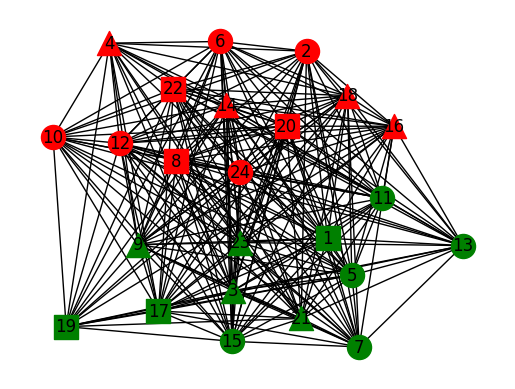

In [20]:

# # Generate the graph
num_nodes = 25
colors = ['red', 'green']
edge_probability = 0.9
node_color_seed = 1234
edge_seed = 20230
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)

# Plot the graph using the function
plot_colored_graph(G)


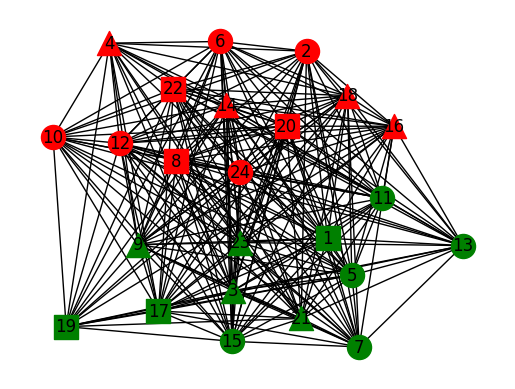

In [21]:
# Create the colored graph
num_nodes = 25
edge_probability = 0.9
node_color_seed = 1234
edge_seed = 20230
colors = ['red', 'green']
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)
# Plot the graph using the function
plot_colored_graph(G)

In [22]:
color_lookup = {}

for node in G.nodes():
    color = G.nodes[node]['color']
    color_lookup[node] = color

print(color_lookup)

{1: 'green', 2: 'red', 3: 'green', 4: 'red', 5: 'green', 6: 'red', 7: 'green', 8: 'red', 9: 'green', 10: 'red', 11: 'green', 12: 'red', 13: 'green', 14: 'red', 15: 'green', 16: 'red', 17: 'green', 18: 'red', 19: 'green', 20: 'red', 21: 'green', 22: 'red', 23: 'green', 24: 'red'}


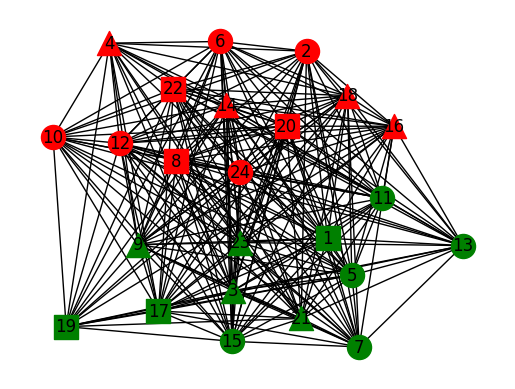

In [23]:
class Agent:
    def __init__(self, start_node, end_node, color_preference):
        self.current_node = start_node
        self.color_preference = color_preference
        self.visited_nodes = set()
        self.visited_shapes = []  # List to store visited shapes
        self.visited_shininess = []  # List to store visited shininess
        self.start_node = start_node
        self.end_node = end_node

    def find_next_node(self, graph):
        neighboring_nodes = list(graph.neighbors(self.current_node))
        unvisited_neighbors = [node for node in neighboring_nodes if node not in self.visited_nodes]

        # Only consider neighbors with the preferred color
        neighbors_with_preference = [node for node in unvisited_neighbors if graph.nodes[node]['color'] == self.color_preference]

        if neighbors_with_preference:
            # Always choose a node with the preferred color
            next_node = random.choice(neighbors_with_preference)
        else:
            # No valid neighbors with the preferred color, return None
            next_node = None

        return next_node

    def traverse_graph(self, graph):
        path = [self.current_node]

        while self.current_node != self.end_node:
            next_node = self.find_next_node(graph)

            if next_node is None:
                # No more valid nodes to traverse, break the loop
                break

            self.visited_nodes.add(next_node)
            path.append(next_node)

            # Record shape and shininess of the visited node
            self.visited_shapes.append(graph.nodes[next_node]['shape'])
            self.visited_shininess.append(graph.nodes[next_node]['shiny'])

            # Move to the next node by following the edge
            self.current_node = next_node

        return path

# Simulate agents with additional features (shapes and shininess)
def simulate_agents(graph, num_agents, num_traversals):
    agent_data = []
    
    for traversal in range(num_traversals):
        success_count = [0] * num_agents  # To track success rate for each agent

        for agent_id in range(num_agents):
            # Create a new agent for each traversal
            start_node = random.choice(list(graph.nodes()))
            end_node = random.choice(list(graph.nodes()))
            color_preference = random.choice(colors)
            agent = Agent(start_node, end_node, color_preference)

            # Record the start time
            start_time = time.time()

            # Traverse the graph with the agent
            path = agent.traverse_graph(graph)

            # Record the end time and compute the time taken
            end_time = time.time()
            time_taken = end_time - start_time
            
            # Check if reached destination
            reached_destination = agent.current_node == agent.end_node
            if reached_destination:
                success_count[agent_id] += 1

            # Compute new variables
            average_speed = len(path) / time_taken if time_taken > 0 else None
            preferred_color_count = sum(1 for node in path if graph.nodes[node]['color'] == color_preference)
            distinct_nodes_visited = len(set(path))
            path_complexity = sum(1 for i in range(1, len(path)) if path[i] != path[i - 1])  
            # Path_complexity is calculated as the count of distinct elements in the path sequence. 
            # i.e., the number of times a different element appears compared to its previous element in the sequence.

            # Additional variables related to shapes and shininess
            visited_shapes = agent.visited_shapes
            visited_shininess = agent.visited_shininess

            # Saving the trajectory data of the agent, including the new variables
            agent_trajectory = {
                'Agent': agent_id,
                'Start Node': start_node,
                'End Node': end_node,
                'Color Preference': color_preference,
                'Path': path,
                'Length': len(path),
                'Time Taken': time_taken,
                'reached_destination': reached_destination,
                'Preferred_Color_Count': preferred_color_count,
                'Distinct_Nodes_Visited': distinct_nodes_visited,
                'Path_Complexity': path_complexity,
                'Visited_Shapes': visited_shapes,
                'Visited_Shininess': visited_shininess
            }

            agent_data.append(agent_trajectory)

    # Create a dataframe from the agent data
    df = pd.DataFrame(agent_data)
    return df

# Generate the colored graph
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)
plot_colored_graph(G)

In [24]:
# Set the number of agents and traversals
num_agents = 5
num_traversals = 20

# Simulate agents traversing the graph and collect the trajectory data
trajectory_df = simulate_agents(G, num_agents, num_traversals)
# filtered_df = trajectory_df[trajectory_df['reached_destination'] == True]
filtered_df = trajectory_df[trajectory_df['Start Node'] != trajectory_df['End Node']]
filtered_df.drop("reached_destination", axis=1, inplace=True)
filtered_df.reset_index(drop=True, inplace=True)


C:\Users\taodz\AppData\Local\Temp\ipykernel_18648\3980483381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("reached_destination", axis=1, inplace=True)


In [25]:
trajectory_df.head(2)

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,reached_destination,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Visited_Shininess
0,0,5,23,green,"[5, 23]",2,0.0,True,2,2,1,[triangle],[shiny]
1,1,13,6,red,"[13, 6]",2,0.0,True,1,2,1,[circle],[shiny]


In [26]:
trajectory_df.shape

(100, 13)

In [27]:
def verify_color_bias(df):
    # Calculate the proportion of preferred color nodes visited in each path
    df['Preferred_Color_Proportion'] = df['Preferred_Color_Count'] / df['Length']
    
    # Calculate the overall average proportion
    overall_average_proportion = df['Preferred_Color_Proportion'].mean()
    
    print("Overall Average Proportion of Preferred Color Nodes:", overall_average_proportion)

    # Expected proportion if there was no bias (assuming equal distribution of colors)
    expected_proportion = 1 / len(colors)
    print("Expected Proportion if No Bias:", expected_proportion)

    # Verify the paths are biased towards the preferred color
    if overall_average_proportion > expected_proportion:
        print("The paths are biased towards the preferred color.")
    else:
        print("The paths do not show a significant bias towards the preferred color.")

In [28]:
verify_color_bias(filtered_df)

Overall Average Proportion of Preferred Color Nodes: 0.9436115816550598
Expected Proportion if No Bias: 0.5
The paths are biased towards the preferred color.


C:\Users\taodz\AppData\Local\Temp\ipykernel_18648\751661017.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preferred_Color_Proportion'] = df['Preferred_Color_Count'] / df['Length']


In [29]:
# Function to map nodes to colors using the lookup table
def map_nodes_to_colors(path, color_lookup):
    return [color_lookup[node] for node in path]

# Apply the mapping function to the 'Path' variable in your dataset
filtered_df['Mapped_Colors'] = filtered_df['Path'].apply(lambda path: map_nodes_to_colors(path, color_lookup))

# Now 'Mapped_Colors' contains the mapped colors for each node in the path
# Modified dataset to be used for clustering


C:\Users\taodz\AppData\Local\Temp\ipykernel_18648\3289032375.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Mapped_Colors'] = filtered_df['Path'].apply(lambda path: map_nodes_to_colors(path, color_lookup))


In [30]:
filtered_df.head(2)

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Visited_Shininess,Preferred_Color_Proportion,Mapped_Colors
0,0,5,23,green,"[5, 23]",2,0.0,2,2,1,[triangle],[shiny],1.0,"[green, green]"
1,1,13,6,red,"[13, 6]",2,0.0,1,2,1,[circle],[shiny],0.5,"[green, red]"


In [18]:
filtered_df.shape

(92, 14)

In [19]:
filtered_df.columns

Index(['Agent', 'Start Node', 'End Node', 'Color Preference', 'Path', 'Length',
       'Time Taken', 'Preferred_Color_Count', 'Distinct_Nodes_Visited',
       'Path_Complexity', 'Visited_Shapes', 'Visited_Shininess',
       'Preferred_Color_Proportion', 'Mapped_Colors'],
      dtype='object')

In [20]:
# Custer the sequenses

In [21]:
# pip install scikit-learn fastcluster python-levenshtein

In [31]:
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN
import Levenshtein as lev
from collections import Counter
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.model_selection import GridSearchCV

df=filtered_df.copy()

In [32]:
# df.Path

In [33]:
# Convert paths from strings to lists of integers
#['Path_Nodes'] = df['Path'].apply(lambda x: list(map(int, x.split('-'))))

In [34]:
# Color look-up table
# color_lookup 

In [35]:
# Define Levenshtein distance function for sequences
def levenshtein_distance(seq1, seq2):
    return lev.distance(''.join(map(str, seq1)), ''.join(map(str, seq2)))

In [36]:
# Create a precomputed distance matrix
num_paths = len(df)
distance_matrix = np.zeros((num_paths, num_paths))

for i in range(num_paths):
    for j in range(num_paths):
        if i != j:
            distance_matrix[i, j] = levenshtein_distance(df.loc[i, 'Path'], df.loc[j, 'Path'])

In [37]:
# Function to perform DBSCAN and return number of clusters
def perform_dbscan(eps, min_samples):
    dbscan = DBSCAN(metric='precomputed', eps=eps, min_samples=min_samples)
    df['Cluster'] = dbscan.fit_predict(distance_matrix)
    num_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'] else 0)
    return df['Cluster'], num_clusters

In [38]:
# Grid search over a range of eps and min_samples
eps_values = np.arange(1,20, 1)
min_samples_values = np.arange(1, 20, 1)
best_eps = None
best_min_samples = None
best_num_clusters = 0
best_silhouette = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        cluster_labels, num_clusters = perform_dbscan(eps, min_samples)
        if num_clusters >1:  # Consider only meaningful cluster configurations
            silhouette_avg = silhouette_score(distance_matrix, cluster_labels, metric="precomputed")
            if silhouette_avg > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_num_clusters = num_clusters
                best_silhouette = silhouette_avg

print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}, Number of clusters: {best_num_clusters}, Silhouette Score: {best_silhouette}")


ValueError: Number of labels is 92. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
# Perform DBSCAN with best parameters
df['Cluster'], _ = perform_dbscan(best_eps, best_min_samples)

In [172]:
# Analyze clusters to identify common patterns and frequent elements
def analyze_clusters(df, color_lookup):
    cluster_analysis = {}
    for cluster in df['Cluster'].unique():
#         if cluster == 0:
#             continue  # Skip noise points
        
        cluster_data = df[df['Cluster'] == cluster]
        all_paths = cluster_data['Path'].tolist()
        
        # Flatten list of lists to a single list of nodes
        all_nodes = [node for path in all_paths for node in path]
        
        # Get the most common elements (nodes and their colors)
        common_nodes = Counter(all_nodes).most_common()
        common_colors = Counter([color_lookup[node] for node in all_nodes]).most_common()
        
        cluster_analysis[cluster] = {
            'Common Nodes': common_nodes,
            'Common Colors': common_colors,
            'Paths': all_paths
        }
    return cluster_analysis

In [173]:
cluster_analysis = analyze_clusters(df, color_lookup)

KeyError: '5'

Cluster 0:
Most Common Nodes: [(5, 1), (23, 1)]
Most Common Colors: [('green', 2)]
Sample Paths: [[5, 23]]

Cluster 1:
Most Common Nodes: [(13, 1), (6, 1)]
Most Common Colors: [('green', 1), ('red', 1)]
Sample Paths: [[13, 6]]

Cluster 2:
Most Common Nodes: [(19, 1), (6, 1), (20, 1), (10, 1), (4, 1), (2, 1), (16, 1)]
Most Common Colors: [('red', 6), ('green', 1)]
Sample Paths: [[19, 6, 20, 10, 4, 2, 16]]

Cluster 3:
Most Common Nodes: [(4, 1), (14, 1), (20, 1), (2, 1), (18, 1), (8, 1), (6, 1), (10, 1), (22, 1), (12, 1), (16, 1), (24, 1)]
Most Common Colors: [('red', 12)]
Sample Paths: [[4, 14, 20, 2, 18, 8, 6, 10, 22, 12, 16, 24]]

Cluster 4:
Most Common Nodes: [(15, 2), (11, 1), (21, 1), (13, 1), (19, 1), (7, 1), (1, 1), (17, 1), (5, 1), (9, 1), (23, 1), (3, 1)]
Most Common Colors: [('green', 13)]
Sample Paths: [[15, 11, 21, 13, 19, 15, 7, 1, 17, 5, 9, 23, 3]]

Cluster 5:
Most Common Nodes: [(9, 1), (14, 1), (18, 1), (4, 1)]
Most Common Colors: [('red', 3), ('green', 1)]
Sample Paths:

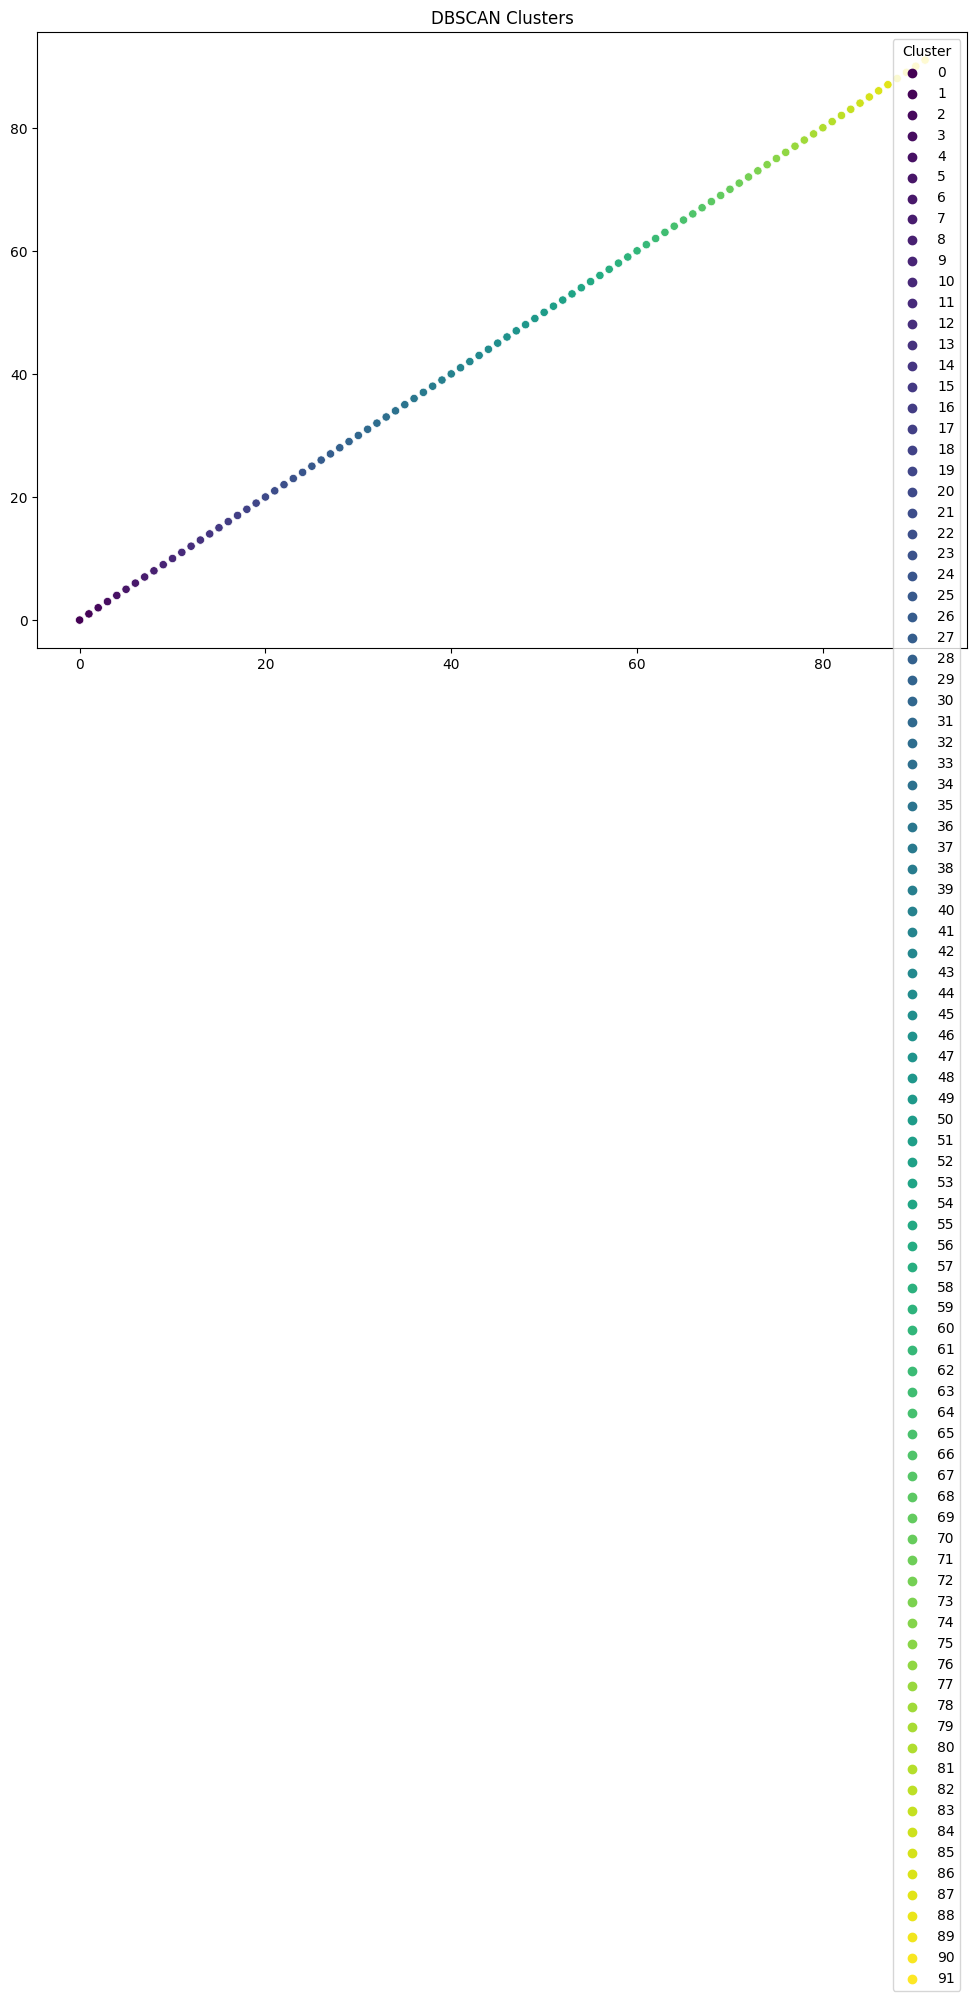

In [142]:
# Print analysis of each cluster
for cluster, analysis in cluster_analysis.items():
    print(f"Cluster {cluster}:")
    print("Most Common Nodes:", analysis['Common Nodes'])
    print("Most Common Colors:", analysis['Common Colors'])
    print("Sample Paths:", analysis['Paths'][:3])  # Print first 3 paths as sample
    print()

# Visualize the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=df.index, y=df.index, hue='Cluster', palette='viridis', legend='full')
plt.title('DBSCAN Clusters')
plt.show()

In [143]:
# Hamming distance
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import numpy as np

In [144]:
# Load the dataset 
# Convert paths to string representation 
filtered_df['Path'] = filtered_df['Path'].apply(lambda x: ''.join(map(str, x)))

C:\Users\taodz\AppData\Local\Temp\ipykernel_10348\3794941390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Path'] = filtered_df['Path'].apply(lambda x: ''.join(map(str, x)))


In [145]:
# Find the maximum length of any path
max_length = filtered_df['Path'].apply(len).max()

In [146]:
# Pad all paths to the same length with a common character, here using '0'
filtered_df['Path'] = filtered_df['Path'].apply(lambda x: x.ljust(max_length, '0'))

C:\Users\taodz\AppData\Local\Temp\ipykernel_10348\1444272152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Path'] = filtered_df['Path'].apply(lambda x: x.ljust(max_length, '0'))


In [174]:
filtered_df['Path'].head()

0    5230000000000000000000
1    1360000000000000000000
2    1962010421600000000000
3    4142021886102212162400
4    1511211319157117592330
Name: Path, dtype: object

In [175]:
# Convert paths to list of characters (each path becomes a list of characters)
paths = filtered_df['Path'].apply(list).tolist()

In [176]:
# Convert list of lists into a 2D numpy array
paths_array = np.array(paths)

In [177]:
paths_array

array([['5', '2', '3', ..., '0', '0', '0'],
       ['1', '3', '6', ..., '0', '0', '0'],
       ['1', '9', '6', ..., '0', '0', '0'],
       ...,
       ['6', '2', '3', ..., '0', '0', '0'],
       ['1', '1', '1', ..., '2', '2', '4'],
       ['2', '1', '9', ..., '0', '0', '0']], dtype='<U1')

In [178]:
# Calculate the distance matrix based on Hamming distance
distance_matrix = pdist(paths_array, metric='hamming')

In [179]:
# Perform hierarchical clustering
Z = linkage(distance_matrix, method='ward')

In [180]:
# Cut the dendrogram at a specific level to form clusters
n_clusters = 2
clusters = fcluster(Z, n_clusters, criterion='maxclust')

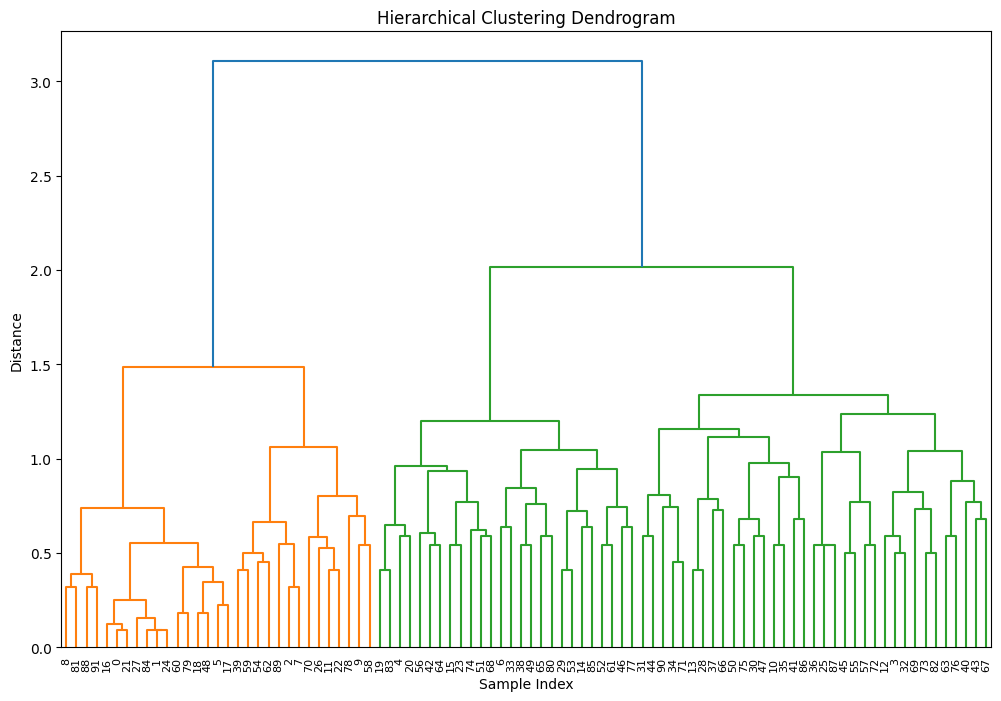

In [181]:
# Visualize the clusters using a dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=filtered_df.index,  # Use index as labels for clarity
    leaf_rotation=90.,  # Rotates the x axis labels
    leaf_font_size=8.,  # Font size for the x axis labels
)
plt.show()

In [182]:
# Print the cluster labels
print("Cluster labels:")
print(clusters)


Cluster labels:
[1 1 1 2 2 1 2 1 1 1 2 1 2 2 2 2 1 1 1 2 2 1 1 2 1 2 1 1 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 1 1 2 1 2 2 2 2 2 2 2 1 2 2 2
 2 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 2 1]


In [183]:
filtered_df['Cluster'] = clusters

C:\Users\taodz\AppData\Local\Temp\ipykernel_10348\416086735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cluster'] = clusters


In [40]:
color_mapping=color_lookup

In [41]:
# Extract color information for each path
def extract_colors(path):
    return [color_mapping[int(char)] for char in path if char.isdigit()]

filtered_df['Colors'] = filtered_df['Path'].apply(extract_colors)

# Count color occurrences in each cluster
color_counts_per_cluster = filtered_df.groupby('Cluster')['Colors'].apply(lambda colors: pd.Series([color for sublist in colors for color in sublist]).value_counts())

# Create a DataFrame to display the color distributions in each cluster
color_distribution_df = color_counts_per_cluster.unstack().fillna(0).astype(int)

print("Color Distributions in Each Cluster:")
print(color_distribution_df)

AttributeError: 'int' object has no attribute 'isdigit'

In [186]:
# Implement Jaccard distance and tune the hyper parameters

In [187]:
# We have our model, how do we extract preferences in a manner that makes sense?

In [188]:
# acuracy calculation

Linkage Method: single
Color Distributions in Each Cluster:
         green  red
Cluster            
1          388   15
2           25  534




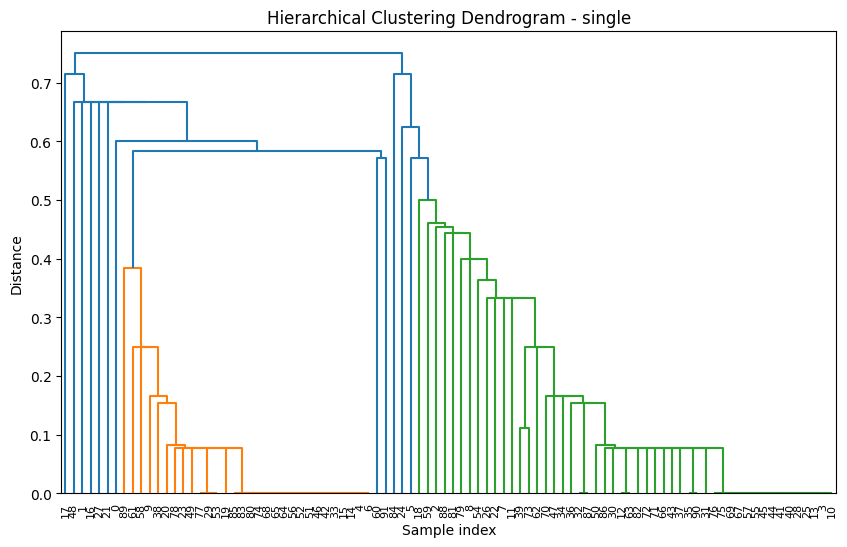

Linkage Method: complete
Color Distributions in Each Cluster:
         red  green
Cluster            
1        549    413




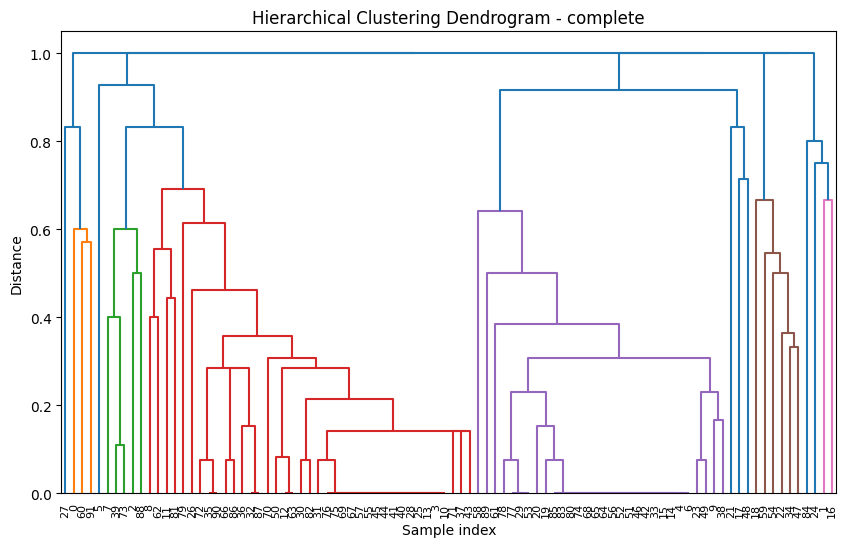

Linkage Method: average
Color Distributions in Each Cluster:
         green  red
Cluster            
1          386   13
2           27  536




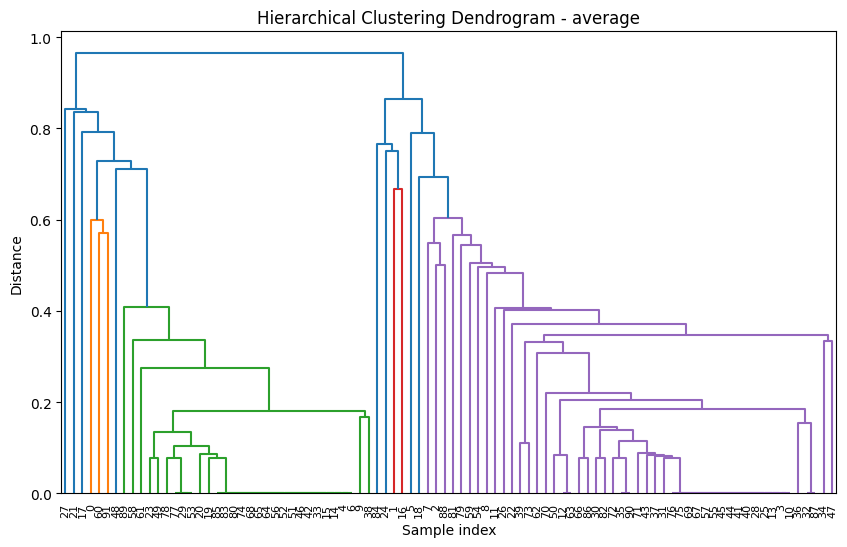

Linkage Method: ward
Color Distributions in Each Cluster:
         green  red
Cluster            
1           24  529
2          389   20




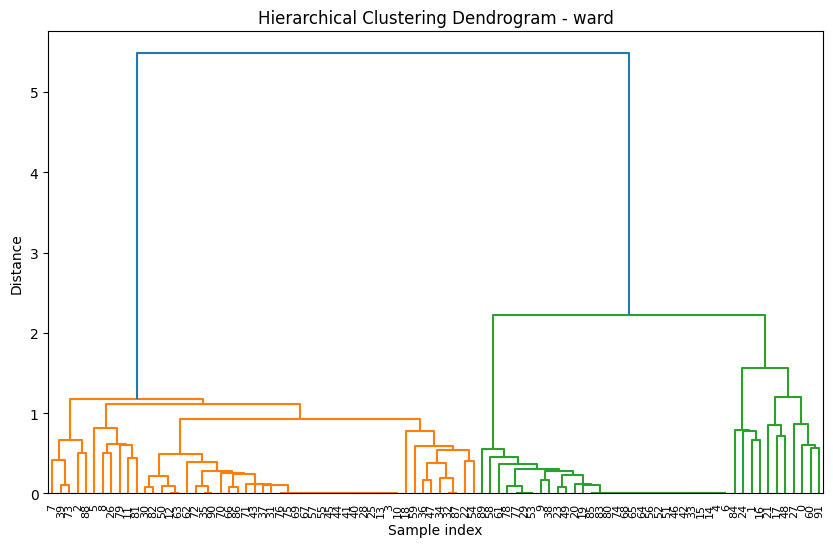

  Linkage Method Distance Metric  Number of Clusters  \
0         single         Jaccard                   2   
1       complete         Jaccard                   2   
2        average         Jaccard                   2   
3           ward         Jaccard                   2   

                          Color Distribution Summary  
0  {1: {'green': 388, 'red': 15}, 2: {'green': 25...  
1                    {1: {'red': 549, 'green': 413}}  
2  {1: {'green': 386, 'red': 13}, 2: {'green': 27...  
3  {1: {'green': 24, 'red': 529}, 2: {'green': 38...  


In [42]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import numpy as np

# Load the dataset
df = filtered_df.copy()

# Convert paths to sets of nodes
df['Path_Set'] = df['Path'].apply(lambda x: set(x))

# Calculate the Jaccard distance matrix
def jaccard_distance(set1, set2):
    if len(set1.union(set2)) == 0:
        return 0
    return 1 - len(set1.intersection(set2)) / len(set1.union(set2))

# Generate the distance matrix
n = len(df)
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        distance_matrix[i, j] = jaccard_distance(df.iloc[i]['Path_Set'], df.iloc[j]['Path_Set'])
        distance_matrix[j, i] = distance_matrix[i, j]

# Convert the distance matrix to a format suitable for linkage
distance_matrix_condensed = squareform(distance_matrix)

# Define a function to perform clustering with different parameters
def hierarchical_clustering(distance_matrix, linkage_method='complete', n_clusters=3):
    # Perform hierarchical clustering
    Z = linkage(distance_matrix, method=linkage_method)
    
    # Cut the dendrogram at a specific level to form clusters
    clusters = fcluster(Z, n_clusters, criterion='maxclust')
    
    return Z, clusters

# Experiment with different hyperparameters
linkage_methods = ['single', 'complete', 'average', 'ward']
n_clusters = 2

results = []

for linkage_method in linkage_methods:
    print(f"Linkage Method: {linkage_method}")
    Z, clusters = hierarchical_clustering(distance_matrix_condensed, linkage_method, n_clusters)
    
    # Assign cluster labels to the original dataframe
    df['Cluster'] = clusters

    # Color mapping dictionary
    color_mapping = color_mapping

    # Extract color information for each path
    def extract_colors(path):
        return [color_mapping[int(node)] for node in path if int(node) in color_mapping]

    df['Colors'] = df['Path'].apply(extract_colors)

    # Count color occurrences in each cluster
    color_counts_per_cluster = df.groupby('Cluster')['Colors'].apply(lambda colors: pd.Series([color for sublist in colors for color in sublist]).value_counts())

    # Create a DataFrame to display the color distributions in each cluster
    color_distribution_df = color_counts_per_cluster.unstack().fillna(0).astype(int)
    
    # Create a summary string for color distributions
    color_distribution_summary = color_distribution_df.apply(lambda x: x.to_dict(), axis=1).to_dict()
    
    results.append({
        'Linkage Method': linkage_method,
        'Distance Metric': 'Jaccard',
        'Number of Clusters': n_clusters,
        'Color Distribution Summary': color_distribution_summary
    })
    
    print("Color Distributions in Each Cluster:")
    print(color_distribution_df)
    print("\n")

    # Optionally, visualize the clusters
    plt.figure(figsize=(10, 6))
    plt.title(f'Hierarchical Clustering Dendrogram - {linkage_method}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels=df.index)
    plt.show()

# Create a DataFrame to display the comparison table
comparison_table = pd.DataFrame(results)

# Display the comparison table
print(comparison_table)


In [43]:
comparison_table

,Linkage Method,Distance Metric,Number of Clusters,Color Distribution Summary
0,single,Jaccard,2,"{1: {'green': 388, 'red': 15}, 2: {'green': 25..."
1,complete,Jaccard,2,"{1: {'red': 549, 'green': 413}}"
2,average,Jaccard,2,"{1: {'green': 386, 'red': 13}, 2: {'green': 27..."
3,ward,Jaccard,2,"{1: {'green': 24, 'red': 529}, 2: {'green': 38..."


In [1121]:
comparison_table.to_csv('Comparison_table_2.csv')

In [1120]:
import os;
cwd=os.getcwd()
cwd

'C:\\Users\\taodz\\Desktop\\PhD_Preferences_2022'

In [541]:
# Notes:
#     It was challenging to reproduce the prev results so I sorted the seed for reproduceability
#         best results are Complete Linkage: Also known as the maximum or furthest point linkage, 
#         it tends to produce compact, spherical clusters. 

In [1023]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Load the dataset
df = filtered_df.copy()

# Convert paths to sets of nodes
df['Path_Set'] = df['Path'].apply(lambda x: set(x))

# Calculate the Jaccard distance matrix
def jaccard_distance(set1, set2):
    if len(set1.union(set2)) == 0:
        return 0
    return 1 - len(set1.intersection(set2)) / len(set1.union(set2))

# Generate the distance matrix
n = len(df)
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(i + 1, n):
        distance_matrix[i, j] = jaccard_distance(df.iloc[i]['Path_Set'], df.iloc[j]['Path_Set'])
        distance_matrix[j, i] = distance_matrix[i, j]

# Convert the distance matrix to a format suitable for linkage
distance_matrix_condensed = squareform(distance_matrix)

# Recursive function for divisive hierarchical clustering
def divisive_clustering(X, n_clusters):
    cluster_labels = np.zeros(X.shape[0])
    current_cluster = 1

    def recursive_split(X, cluster_labels, current_cluster):
        if current_cluster >= n_clusters:
            return

        # Apply KMeans to split the current cluster into two
        kmeans = KMeans(n_clusters=2)
        kmeans.fit(X)
        labels = kmeans.labels_

        # Assign new cluster labels
        mask = (cluster_labels == 0)
        cluster_labels[mask & (labels == 1)] = current_cluster
        cluster_labels[mask & (labels == 0)] = current_cluster + 1

        # Recursive call
        recursive_split(X[cluster_labels == current_cluster], cluster_labels[cluster_labels == current_cluster], current_cluster + 1)
        recursive_split(X[cluster_labels == current_cluster + 1], cluster_labels[cluster_labels == current_cluster + 1], current_cluster + 2)

    recursive_split(X, cluster_labels, current_cluster)
    return cluster_labels

# Perform divisive hierarchical clustering
n_clusters = 2
X = distance_matrix
cluster_labels = divisive_clustering(X, n_clusters)
df['Cluster'] = cluster_labels

# Color mapping dictionary
color_mapping = color_mapping

# Extract color information for each path
def extract_colors(path):
    return [color_mapping[int(node)] for node in path if int(node) in color_mapping]

df['Colors'] = df['Path'].apply(extract_colors)

# Count color occurrences in each cluster
color_counts_per_cluster = df.groupby('Cluster')['Colors'].apply(lambda colors: pd.Series([color for sublist in colors for color in sublist]).value_counts())

# Create a DataFrame to display the color distributions in each cluster
color_distribution_df = color_counts_per_cluster.unstack().fillna(0).astype(int)

# Summarize color distributions
color_distribution_summary = color_distribution_df.apply(lambda x: x.to_dict(), axis=1).to_dict()

# Display the results
results = [{
    'Clustering Method': 'Divisive',
    'Distance Metric': 'Jaccard',
    'Number of Clusters': n_clusters,
    'Color Distribution Summary': color_distribution_summary
}]

comparison_table = pd.DataFrame(results)
print(comparison_table)


  Clustering Method Distance Metric  Number of Clusters  \
0  Divisive          Jaccard         2                    

                                          Color Distribution Summary  
0  {1.0: {'red': 298, 'green': 202}, 2.0: {'red': 204, 'green': 36}}  


C:\Users\taodz\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [843]:
pd.set_option('display.max_colwidth', -1)

C:\Users\taodz\AppData\Local\Temp\ipykernel_6504\3652881321.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [844]:
comparison_table.columns

Index(['Clustering Method', 'Distance Metric', 'Number of Clusters',
       'Color Distribution Summary'],
      dtype='object')

In [845]:
comparison_table

,Clustering Method,Distance Metric,Number of Clusters,Color Distribution Summary
0,Divisive,Jaccard,2,"{1.0: {'red': 88, 'green': 74}, 2.0: {'red': 103, 'green': 11}}"


In [159]:
df['Cluster'] = clusters

In [358]:
df.head(2)

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Visited_Shininess,Preferred_Color_Proportion,Mapped_Colors,Cluster,Colors,Path_Set
0,0,5,9,green,51151199000000000000000,6,0.0,6,5,5,"[circle, square, circle, triangle, circle]","[shiny, shiny, not_shiny, not_shiny, not_shiny]",1.000000,"[green, green, green, green, green, green]",1,"[green, green, green, green, green, green, gre...","{9, 5, 0, 1}"
1,1,7,8,red,72224620800000000000000,6,0.0,5,6,5,"[triangle, square, triangle, circle, square]","[shiny, shiny, shiny, shiny, shiny]",0.833333,"[green, red, red, red, red, red]",2,"[green, red, red, red, red, red, red, red, red...","{0, 6, 7, 4, 2, 8}"


In [ ]:
# 1. Extract Preferences from each cluster 2. Extract preferences and make sense of the variables 

In [ ]:
# Say we didnt know the features

In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features and target
total_nodes=num_nodes
Clustering=df
# Flatten the lists in 'Visited_Shapes'
Clustering['Visited_Shapes'] = Clustering['Visited_Shapes'].apply(lambda x: '|'.join(x))

# One-hot encode categorical columns
X = Clustering[['Path_Complexity', 'Preferred_Color_Count','Distinct_Nodes_Visited', 'Visited_Shapes']]
X = pd.get_dummies(X, columns=['Visited_Shapes'])
y = Clustering['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Optionally sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Save to CSV
feature_importance_df.to_csv('feature_importances.csv', index=False)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

In [ ]:
# Multi-classification approach to build a model based on each cluster and extract feature importances
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [162]:
# Define the clusters you want to analyze 
clusters_to_analyze = np.unique(cluster_labels).tolist()

In [163]:
# Create an empty dictionary to store feature importances for each cluster
feature_importance_dict = {}

In [ ]:
# Flatten the lists in 'Visited_Shapes'
# Clustering['Visited_Shapes'] = Clustering['Visited_Shapes'].apply(lambda x: '|'.join(x))

In [164]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [165]:
for cluster in clusters_to_analyze:
    # Subset the data for the current cluster
    cluster_data = df.copy()  # Make a copy of the original data
    cluster_data['Cluster'] = np.where(cluster_data['Cluster'] == cluster, 1, 0)  # Convert to binary labels

    # One-hot encode categorical columns
    X = cluster_data[['Path_Complexity', 'Preferred_Color_Count', 'Distinct_Nodes_Visited', 'Visited_Shapes']]
    X = pd.get_dummies(X, columns=['Visited_Shapes'])

    y = cluster_data['Cluster']  # Binary labels for the current cluster

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the XGBoost model for binary classification
    model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances for the current cluster
    feature_importances = model.feature_importances_

    # Create a DataFrame to store the feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    # Store feature importances in the dictionary with the cluster as the key
    feature_importance_dict[f'Cluster_{cluster}_importance'] = feature_importance_df

    # Print or save feature importances for this cluster if needed
    print(f"Feature importances for Cluster {cluster}:")
    print(feature_importance_df.head())

TypeError: unhashable type: 'list'

In [161]:









for cluster in clusters_to_analyze:
    # Subset the data for the current cluster
    cluster_data = df.copy()  # Make a copy of the original data
    cluster_data['Cluster'] = np.where(cluster_data['Cluster'] == cluster, 1, 0)  # Convert to binary labels

    # One-hot encode categorical columns
    X = cluster_data[['Path_Complexity', 'Preferred_Color_Count', 'Distinct_Nodes_Visited', 'Visited_Shapes']]
    X = pd.get_dummies(X, columns=['Visited_Shapes'])

    y = cluster_data['Cluster']  # Binary labels for the current cluster

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the XGBoost model for binary classification
    model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances for the current cluster
    feature_importances = model.feature_importances_

    # Create a DataFrame to store the feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    # Store feature importances in the dictionary with the cluster as the key
    feature_importance_dict[f'Cluster_{cluster}_importance'] = feature_importance_df

    # Print or save feature importances for this cluster if needed
    print(f"Feature importances for Cluster {cluster}:")
    print(feature_importance_df.head())

# Save feature importances to CSV for each cluster if needed
for cluster, importance_df in feature_importance_dict.items():
    importance_df.to_csv(f'feature_importances_cluster_{cluster}.csv', index=False)


TypeError: unhashable type: 'list'

In [138]:
#Analysis of Data Quality 

In [140]:
#Clustering Approach 01: 
#Using an approach that represents each path by counting the occurrence of each node (akin to a Bag of Words model)
  
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
data = filtered_df[['Agent','Path']]

# Convert the 'Path' column to a string format as expected by CountVectorizer
data['Path'] = [' '.join(map(str, path)) for path in data['Path']]
df = pd.DataFrame(data)

# Generate embeddings
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Path']).toarray()

# Apply clustering KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

# Assign the cluster labels back to the dataframe
df['Cluster'] = kmeans.labels_

# Display the dataframe with cluster assignments
print(df)
# Clustering Evaluation with Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Data Dimensionality Reduction with PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualization of the Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Cluster visualization after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


KeyError: "['Agent'] not in index"

In [71]:
filtered_df_01 = pd.merge(filtered_df, df[['Agent', 'Cluster']], on='Agent', how='left')

KeyError: "['Cluster'] not in index"

In [ ]:
filtered_df_01.tail(2)

In [242]:
# Calculate color counts in each cluster
color_counts_per_cluster = filtered_df_01.groupby(['Cluster', 'Color Preference']).size().unstack(fill_value=0)

# Display the table
# print("Color Counts in Each Cluster:")
# print(color_counts_per_cluster)

# Calculate the total counts of all color preferences within each cluster
total_counts_per_cluster = color_counts_per_cluster.sum(axis=1)
# Calculate percentages
color_percentage_per_cluster = (color_counts_per_cluster.div(total_counts_per_cluster, axis=0) * 100)
# Display the percentage table
print("Color Preference Percentage in Each Cluster:")
print(color_percentage_per_cluster)


Color Preference Percentage in Each Cluster:
Color Preference      green        red
Cluster                               
0                 46.031746  53.968254
1                 50.862069  49.137931


In [243]:
#Fine Tuning

C:\Users\taodz\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\taodz\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\taodz\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\taodz\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\taodz\miniconda3\lib\site-packages\sklearn\

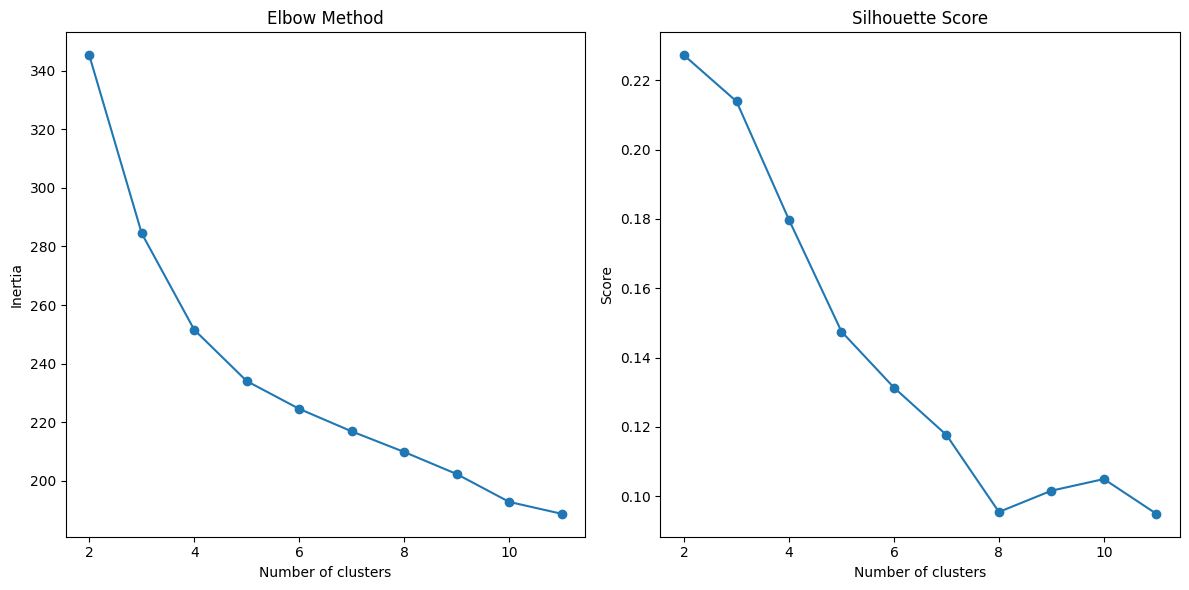

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Since X is my feature matrix after CountVectorizer Above
inertia = []
silhouette_scores = []
range_clusters = range(2, 12) 

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


In [ ]:
#Implementing Complex Sequence Embeddings( Wav2Vec) 

In [116]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

# Example DataFrame
df = filtered_df[['Agent','Path']]

# Convert numeric nodes to strings (Word2Vec expects strings)
df['Path_str'] = df['Path'].apply(lambda x: [str(node) for node in x])

# Train a Word2Vec model
model = Word2Vec(sentences=df['Path_str'], vector_size=100, window=5, min_count=1, workers=4)

# Generate embeddings for each path by averaging node embeddings
def get_path_embedding(path, model):
    embeddings = [model.wv[node] for node in path if node in model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(model.vector_size)

df['Path_embedding'] = df['Path_str'].apply(lambda x: get_path_embedding(x, model))

# Convert the list of embeddings into a format suitable for clustering
X = np.array(list(df['Path_embedding']))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display the DataFrame with cluster assignments
print(df[['Path', 'Cluster']])


                                                 Path  Cluster
0   [4, 7, 15, 29, 9, 25, 21, 5, 3, 23, 12, 1, 17,...        1
1   [2, 0, 14, 6, 24, 4, 10, 8, 20, 26, 12, 2, 16,...        0
2        [14, 16, 14, 0, 6, 24, 8, 12, 10, 26, 20, 7]        0
3                [19, 6, 4, 2, 12, 26, 20, 8, 24, 18]        0
4   [28, 5, 11, 17, 15, 13, 19, 1, 27, 25, 9, 29, ...        1
..                                                ...      ...
80  [29, 18, 28, 4, 6, 24, 8, 10, 22, 0, 16, 2, 12...        0
81  [21, 13, 19, 29, 15, 17, 27, 1, 9, 3, 23, 8, 2...        1
82  [17, 28, 10, 4, 14, 12, 2, 16, 6, 24, 18, 0, 2...        0
83       [19, 6, 16, 2, 12, 14, 22, 0, 10, 18, 24, 4]        0
84    [7, 15, 17, 27, 25, 5, 21, 13, 19, 1, 9, 11, 4]        1

[85 rows x 2 columns]


C:\Users\taodz\AppData\Local\Temp\ipykernel_11964\3800395565.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Path_str'] = df['Path'].apply(lambda x: [str(node) for node in x])
C:\Users\taodz\AppData\Local\Temp\ipykernel_11964\3800395565.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Path_embedding'] = df['Path_str'].apply(lambda x: get_path_embedding(x, model))
C:\Users\taodz\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will cha

In [117]:
filtered_df_02 = pd.merge(filtered_df, df[['Agent', 'Cluster']], on='Agent', how='left')

In [118]:
filtered_df_02.head(1)

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Mapped_Colors,Combined_Colors_Path,Cluster
0,1,4,16,yellow,"[4, 7, 15, 29, 9, 25, 21, 5, 3, 23, 12, 1, 17,...",21,0.0,14,20,20,"[circle, square, square, triangle, triangle, c...","[red, yellow, yellow, yellow, yellow, yellow, ...","[(red, 4), (yellow, 7), (yellow, 15), (yellow,...",1


In [119]:
# Calculate color counts in each cluster
color_counts_per_cluster = filtered_df_02.groupby(['Cluster', 'Color Preference']).size().unstack(fill_value=0)

# Display the table
# print("Color Counts in Each Cluster:")
# print(color_counts_per_cluster)

# Calculate the total counts of all color preferences within each cluster
total_counts_per_cluster = color_counts_per_cluster.sum(axis=1)
# Calculate percentages
color_percentage_per_cluster = (color_counts_per_cluster.div(total_counts_per_cluster, axis=0) * 100)
# Display the percentage table
print("Color Preference Percentage in Each Cluster:")
print(color_percentage_per_cluster)


Color Preference Percentage in Each Cluster:
Color Preference        red     yellow
Cluster                               
0                 57.183099  42.816901
1                 38.918919  61.081081


Word2Vec Parameters: The choice of parameters like vector_size and window can significantly affect the quality of your embeddings. Experiment with different values based on the characteristics of your data.

Averaging Embeddings: Averaging the embeddings of nodes to represent a path is a simple approach. More sophisticated methods might consider the sequence's structure more explicitly.

Clustering: The choice of clustering algorithm and its parameters (e.g., n_clusters for KMeans) should be guided by the nature of your data and the specific requirements of your analysis. For more complex data, consider using density-based clustering algorithms like DBSCAN or HDBSCAN.

Dimensionality Reduction: Depending on the dimensionality of your embeddings and the clustering algorithm, you might benefit from dimensionality reduction techniques (e.g., PCA, t-SNE) before clustering.

In [120]:
# Implementing DBSCAN

In [121]:
df.head()

,Agent,Path,Path_str,Path_embedding,Cluster
0,1,"[4, 7, 15, 29, 9, 25, 21, 5, 3, 23, 12, 1, 17,...","[4, 7, 15, 29, 9, 25, 21, 5, 3, 23, 12, 1, 17,...","[-0.0032574474, 0.0034312613, 0.001853231, 0.0...",1
1,3,"[2, 0, 14, 6, 24, 4, 10, 8, 20, 26, 12, 2, 16,...","[2, 0, 14, 6, 24, 4, 10, 8, 20, 26, 12, 2, 16,...","[-0.0023020834, 0.004250603, 0.0020023647, 0.0...",0
2,4,"[14, 16, 14, 0, 6, 24, 8, 12, 10, 26, 20, 7]","[14, 16, 14, 0, 6, 24, 8, 12, 10, 26, 20, 7]","[-0.0010778662, 0.004837146, 0.0017727833, 0.0...",0
3,6,"[19, 6, 4, 2, 12, 26, 20, 8, 24, 18]","[19, 6, 4, 2, 12, 26, 20, 8, 24, 18]","[-0.0027102246, 0.0036144212, 0.0037059672, 0....",0
4,7,"[28, 5, 11, 17, 15, 13, 19, 1, 27, 25, 9, 29, ...","[28, 5, 11, 17, 15, 13, 19, 1, 27, 25, 9, 29, ...","[-0.001507047, 0.0047060233, 0.0010942615, 0.0...",1


DBSCAN is particularly suitable for this task as it can handle clusters of arbitrary shape and does not require specifying the number of clusters in advance. Its ability to identify outliers as noise makes it robust for real-world data clustering tasks.

Let's continue from where we left off, using the embeddings generated from the Word2Vec model to perform DBSCAN clustering. 

The plot might show a sharp increase (elbow) at some point; this distance could be a good starting eps value for DBSCAN.
Strategies for Adjusting DBSCAN Parameters:
a. Adjusting eps Value:
One approach to finding a suitable eps value is to analyze the distance to the 

n being equal to min_samples) for each point in the dataset. Plotting these distances sorted in ascending order can help identify an "elbow" point that serves as a good eps value.
b. Optimizing min_samples:
min_samples generally depends on the dimensionality of your data and the degree of noise. As a starting point, min_samples can be set to the dimensionality of the data plus one or higher. However, tuning this parameter requires understanding the data's structure and potentially experimenting with different values.

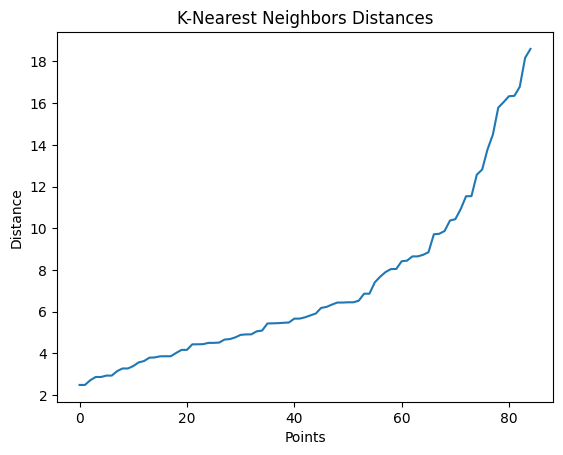

In [132]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming X_standardized is your feature matrix
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_standardized)
distances, indices = neighbors_fit.kneighbors(X_standardized)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

plt.plot(distances)
plt.title('K-Nearest Neighbors Distances')
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()

In [133]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Example DataFrame
df_01 = df[['Agent','Path']]

# `X` contains path embeddings from the previous model
# It's often beneficial to standardize features by removing the mean and scaling to unit variance
X_standardized = StandardScaler().fit_transform(X)

# Apply DBSCAN
# eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other
# min_samples: The number of samples in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=10, min_samples=5)

df_01['Cluster'] = dbscan.fit_predict(X_standardized)

# Display the DataFrame with DBSCAN cluster assignments
print(df_01[['Path', 'Cluster']])


                                                 Path  Cluster
0   [4, 7, 15, 29, 9, 25, 21, 5, 3, 23, 12, 1, 17,...        0
1   [2, 0, 14, 6, 24, 4, 10, 8, 20, 26, 12, 2, 16,...        0
2        [14, 16, 14, 0, 6, 24, 8, 12, 10, 26, 20, 7]        0
3                [19, 6, 4, 2, 12, 26, 20, 8, 24, 18]        0
4   [28, 5, 11, 17, 15, 13, 19, 1, 27, 25, 9, 29, ...        0
..                                                ...      ...
80  [29, 18, 28, 4, 6, 24, 8, 10, 22, 0, 16, 2, 12...        0
81  [21, 13, 19, 29, 15, 17, 27, 1, 9, 3, 23, 8, 2...        0
82  [17, 28, 10, 4, 14, 12, 2, 16, 6, 24, 18, 0, 2...        0
83       [19, 6, 16, 2, 12, 14, 22, 0, 10, 18, 24, 4]        0
84    [7, 15, 17, 27, 25, 5, 21, 13, 19, 1, 9, 11, 4]        0

[85 rows x 2 columns]


C:\Users\taodz\AppData\Local\Temp\ipykernel_11964\2194543473.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_01['Cluster'] = dbscan.fit_predict(X_standardized)


In [139]:
# X_standardized is my standardized feature matrix and df['Cluster'] contains cluster labels
# silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to 
# other clusters (separation). The silhouette scores range from -1 to 1, where a high value indicates that 
# the object is well matched to its own cluster and poorly matched to neighboring clusters.
score = silhouette_score(X_standardized, df_01['Cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.3239421844482422


In [140]:
# The Calinski-Harabasz index is another metric for evaluating clustering performance, 
# measuring the cluster cohesion and separation. 
# Higher values generally indicate better-defined clusters.
from sklearn.metrics import calinski_harabasz_score
ch_score = calinski_harabasz_score(X_standardized, df_01['Cluster'])
print(f"Calinski-Harabasz Score: {ch_score}")


Calinski-Harabasz Score: 2.1504007176200064


In [134]:
df_01.describe()

,Agent,Cluster
count,85.000000,85.000000
mean,4.494118,-0.200000
std,2.897550,0.402374
min,0.000000,-1.000000
25%,2.000000,0.000000
50%,4.000000,0.000000
75%,7.000000,0.000000
max,9.000000,0.000000


In [135]:
filtered_df_03 = pd.merge(filtered_df, df_01[['Agent', 'Cluster']], on='Agent', how='left')

In [142]:
filtered_df_03.head(1)

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Mapped_Colors,Combined_Colors_Path,Cluster
0,1,4,16,yellow,"[4, 7, 15, 29, 9, 25, 21, 5, 3, 23, 12, 1, 17,...",21,0.0,14,20,20,"[circle, square, square, triangle, triangle, c...","[red, yellow, yellow, yellow, yellow, yellow, ...","[(red, 4), (yellow, 7), (yellow, 15), (yellow,...",0


In [141]:
# Calculate color counts in each cluster
color_counts_per_cluster = filtered_df_03.groupby(['Cluster', 'Color Preference']).size().unstack(fill_value=0)

# Display the table
# print("Color Counts in Each Cluster:")
# print(color_counts_per_cluster)

# Calculate the total counts of all color preferences within each cluster
total_counts_per_cluster = color_counts_per_cluster.sum(axis=1)
# Calculate percentages
color_percentage_per_cluster = (color_counts_per_cluster.div(total_counts_per_cluster, axis=0) * 100)
# Display the percentage table
print("Color Preference Percentage in Each Cluster:")
print(color_percentage_per_cluster)


Color Preference Percentage in Each Cluster:
Color Preference        red     yellow
Cluster                               
-1                45.890411  54.109589
 0                48.359240  51.640760


In [ ]:
#Clustering with Combined Features

In [48]:
# Function to combine mapped colors and path
def combine_colors_and_path(mapped_colors, path):
    combined = []
    for color, node in zip(mapped_colors, path):
        combined.append((color, node))
    return combined

# Apply the function to the 'Mapped_Colors' and 'Path' variables
filtered_df['Combined_Colors_Path'] = filtered_df.apply(lambda row: combine_colors_and_path(row['Mapped_Colors'], row['Path']), axis=1)

# Now 'Combined_Colors_Path' contains the combined colors and path for each row
# We can use this modified dataset for hierarchical clustering


In [168]:
def combine_colors_and_path_to_binary(mapped_colors, path, color_set):
    combined_binary = []
    for node in path:
        color_binary = [1 if color == node_color else 0 for node_color in color_set]
        combined_binary.extend(color_binary)
    return combined_binary

# Get unique colors from the dataset
color_set = set(filtered_df['Mapped_Colors'].explode())

# Apply the function to the 'Mapped_Colors' and 'Path' variables
filtered_df['Combined_Colors_Path_Binary'] = filtered_df.apply(lambda row: combine_colors_and_path_to_binary(row['Mapped_Colors'], row['Path'], color_set), axis=1)


In [169]:
filtered_df.head(2)

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Mapped_Colors,Combined_Colors_Path,Combined_Colors_Path_Binary,Cluster
0,3,16,8,red,"[16, 0, 14, 12, 2, 16, 10, 6, 20, 8]",10,0.0,10,9,9,"[triangle, triangle, triangle, circle, circle,...","[red, red, red, red, red, red, red, red, red, ...","[(red, 16), (red, 0), (red, 14), (red, 12), (r...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",1
1,4,23,28,yellow,"[23, 3, 23, 29, 19, 25, 27, 1, 9, 13, 15, 17, ...",27,0.0,16,26,26,"[circle, square, square, circle, triangle, tri...","[yellow, yellow, yellow, yellow, yellow, yello...","[(yellow, 23), (yellow, 3), (yellow, 23), (yel...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",4


In [163]:
from scipy.spatial.distance import hamming
from sklearn.cluster import AgglomerativeClustering

# Function to compute Hamming distance between two binary vectors
def compute_hamming_distance(vector1, vector2):
    return hamming(vector1, vector2)
# Calculate the maximum length of binary vectors
max_length = max(len(vector) for vector in filtered_df['Combined_Colors_Path_Binary'])

# Pad the binary vectors with zeros to ensure consistent length
padded_binary_vectors = []
for vector in filtered_df['Combined_Colors_Path_Binary']:
    padded_vector = vector + [0] * (max_length - len(vector))
    padded_binary_vectors.append(padded_vector)

# Calculate pairwise Hamming distances between trajectories
distance_matrix = []
for i in range(len(filtered_df)):
    distances = []
    for j in range(len(filtered_df)):
        if i == j:
            distances.append(0)  # Diagonal elements
        else:
            distance = compute_hamming_distance(padded_binary_vectors[i], padded_binary_vectors[j])
            distances.append(distance)
    distance_matrix.append(distances)

# Perform hierarchical clustering using AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
clusters = clustering.fit_predict(distance_matrix)

# Add cluster labels to the DataFrame
filtered_df['Cluster'] = clusters


C:\Users\taodz\miniconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [158]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Compute silhouette score
silhouette_avg = silhouette_score(distance_matrix, clusters)
print("Silhouette Score:", silhouette_avg)

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(distance_matrix, clusters)
print("Davies-Bouldin Index:", db_index)

# Compute Calinski-Harabasz Index
ch_index = calinski_harabasz_score(distance_matrix, clusters)
print("Calinski-Harabasz Index:", ch_index)


Silhouette Score: 0.537887929607246
Davies-Bouldin Index: 0.5087609499023218
Calinski-Harabasz Index: 885.6988991989186


C:\Users\taodz\AppData\Local\Temp\ipykernel_13968\2600924335.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='complete')


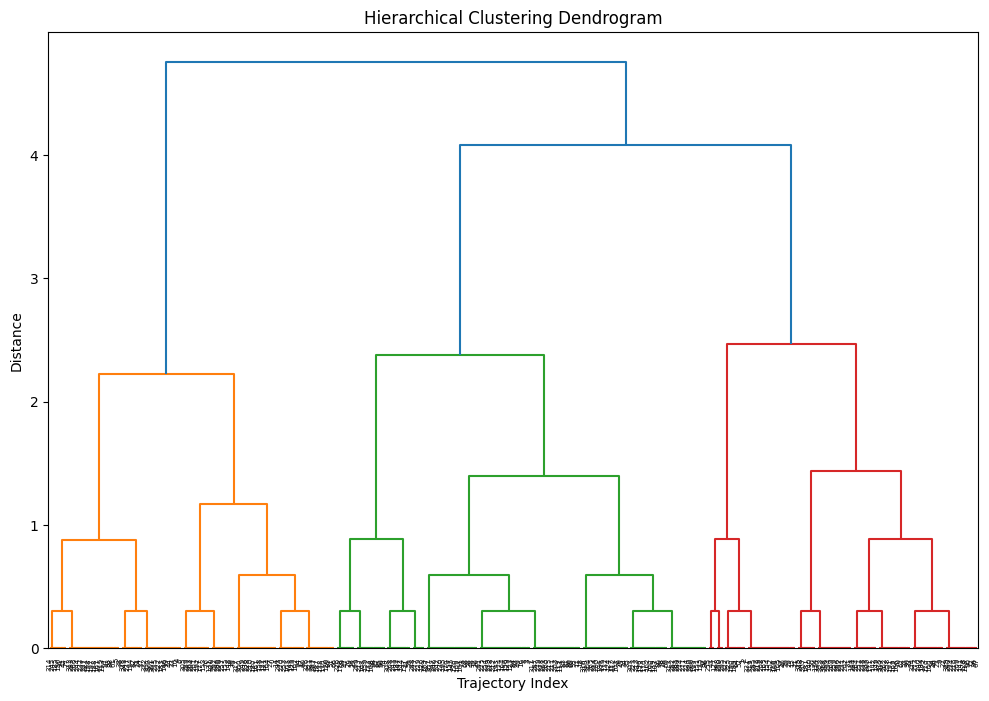

In [159]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering to obtain linkage matrix
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=filtered_df.index.tolist())
plt.xlabel('Trajectory Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [160]:
filtered_df.head(4)

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Mapped_Colors,Combined_Colors_Path,Combined_Colors_Path_Binary,Cluster
0,3,16,8,red,"[16, 0, 14, 12, 2, 16, 10, 6, 20, 8]",10,0.0,10,9,9,"[triangle, triangle, triangle, circle, circle,...","[red, red, red, red, red, red, red, red, red, ...","[(red, 16), (red, 0), (red, 14), (red, 12), (r...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",1
1,4,23,28,yellow,"[23, 3, 23, 29, 19, 25, 27, 1, 9, 13, 15, 17, ...",27,0.0,16,26,26,"[circle, square, square, circle, triangle, tri...","[yellow, yellow, yellow, yellow, yellow, yello...","[(yellow, 23), (yellow, 3), (yellow, 23), (yel...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",4
2,5,24,17,red,"[24, 6, 20, 26, 12, 8, 10, 22, 14, 0, 18, 24, ...",27,0.0,16,26,26,"[circle, square, triangle, triangle, circle, t...","[red, red, red, red, red, red, red, red, red, ...","[(red, 24), (red, 6), (red, 20), (red, 26), (r...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",4
3,6,22,20,red,"[22, 0, 6, 4, 14, 12, 8, 24, 18, 10, 22, 11, 2...",19,0.0,15,18,18,"[triangle, circle, triangle, triangle, triangl...","[red, red, red, red, red, red, red, red, red, ...","[(red, 22), (red, 0), (red, 6), (red, 4), (red...","[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, ...",0


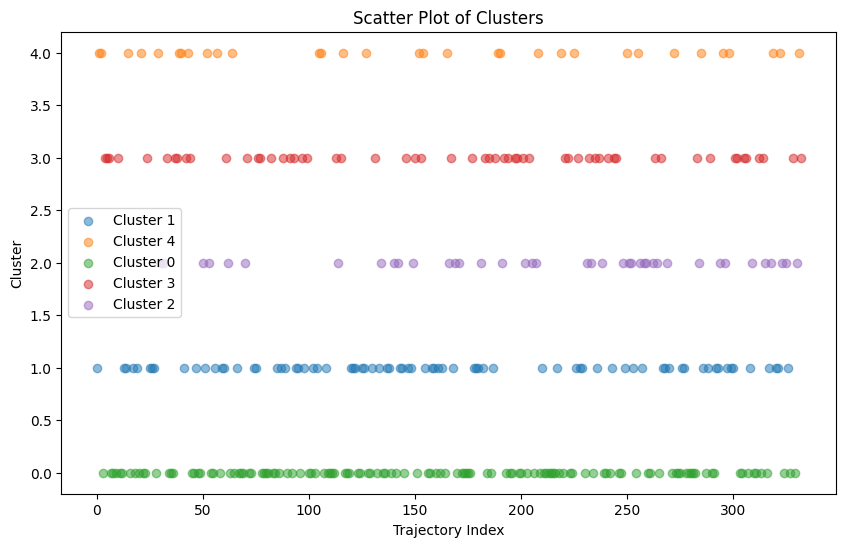

In [161]:
import matplotlib.pyplot as plt

# Scatter plot for clusters
plt.figure(figsize=(10, 6))
for cluster_id in filtered_df['Cluster'].unique():
    cluster_data = filtered_df[filtered_df['Cluster'] == cluster_id]
    plt.scatter(cluster_data.index, cluster_data['Cluster'], label=f'Cluster {cluster_id}', alpha=0.5)
plt.xlabel('Trajectory Index')
plt.ylabel('Cluster')
plt.title('Scatter Plot of Clusters')
plt.legend()
plt.show()



In [162]:
# Calculate color counts in each cluster
color_counts_per_cluster = filtered_df.groupby(['Cluster', 'Color Preference']).size().unstack(fill_value=0)

# Display the table
print("Color Counts in Each Cluster:")
print(color_counts_per_cluster)


Color Counts in Each Cluster:
Color Preference  red  yellow
Cluster                      
0                  68      57
1                  34      43
2                  18      23
3                  30      28
4                  12      20


In [ ]:
# Implement DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Select the binary vectors for clustering
X_binary = filtered_df['Combined_Colors_Path_Binary'].tolist()

# Instantiate DBSCAN
eps = 0.5  # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_samples = 5  # The number of samples (or total weight) in a neighborhood for a point to be considered as a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='hamming')

# Fit DBSCAN to the binary data
clusters = dbscan.fit_predict(X_binary)

# Add cluster labels to the DataFrame
filtered_df['DBSCAN_Cluster'] = clusters


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate clustering
# Since DBSCAN doesn't inherently provide silhouette score, we'll focus on visual inspection
# You can also use alternative metrics like Davies-Bouldin index if needed

# Visualize clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x=filtered_df.index, y='DBSCAN_Cluster', hue='DBSCAN_Cluster', palette='Set1', legend='full')
plt.xlabel('Trajectory Index')
plt.ylabel('Cluster')
plt.title('DBSCAN Clustering')
plt.legend(title='Cluster')
plt.show()

# Generate table with cluster and color counts
cluster_color_counts = filtered_df.groupby(['DBSCAN_Cluster', 'Color Preference']).size().unstack(fill_value=0)
print("Cluster and Color Counts:")
print(cluster_color_counts)


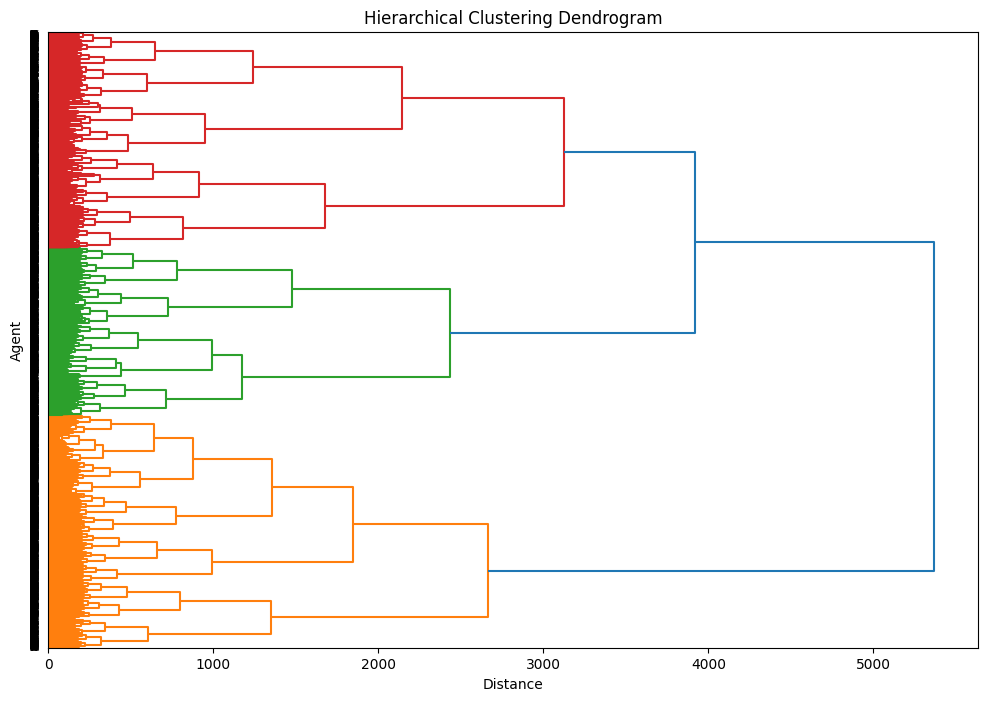

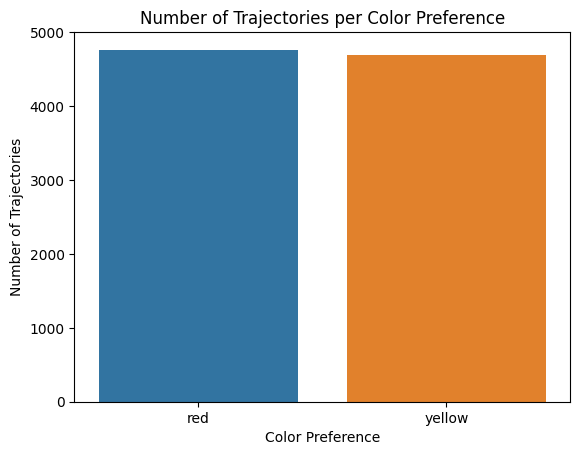

In [31]:
# Hierachical Clustering using linkage

from scipy.cluster.hierarchy import dendrogram, linkage

df = filtered_df.copy()
# Create a distance matrix based on the path lengths
# distance_matrix = np.zeros((len(df), len(df)))
# for i, path1 in enumerate(df['Path']):
#     for j, path2 in enumerate(df['Path']):
#         distance_matrix[i, j] = len(set(path1 + path2)) - len(set(path1))
distance_matrix1=distance_matrix.copy()
# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix1, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df['Agent'].tolist(), orientation='right')
plt.xlabel('Distance')
plt.ylabel('Agent')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [100]:
# Create a dictionary to store the color frequencies within each cluster
cluster_color_counts = {}

# Iterate over each node and its corresponding cluster label
for node, cluster in zip(G.nodes(), cluster_labels):
    color = node_colors[node]
    
    # Get the cluster color count dictionary for the current cluster
    cluster_color_count = cluster_color_counts.setdefault(cluster, {})
    
    # Increment the color count within the cluster
    cluster_color_count[color] = cluster_color_count.get(color, 0) + 1

# Iterate over the cluster color counts to calculate the percentages
cluster_color_percentages = {}
for cluster, color_counts in cluster_color_counts.items():
    total_count = sum(color_counts.values())
    color_percentages = {color: count / total_count * 100 for color, count in color_counts.items()}
    cluster_color_percentages[cluster] = color_percentages

cluster_color_percentages


{0: {'red': 53.333333333333336, 'yellow': 46.666666666666664},
 2: {'yellow': 58.06451612903226, 'red': 41.935483870967744},
 3: {'red': 57.14285714285714, 'yellow': 42.857142857142854},
 1: {'red': 50.0, 'yellow': 50.0}}

In [101]:
np.unique(cluster_labels).tolist()

[0, 1, 2, 3]

In [102]:
# Calculate the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df['Color Preference'], cluster_labels)
print("Adjusted Rand Index (ARI):", ari)

# Calculate the Adjusted Mutual Information (AMI)
ami = adjusted_mutual_info_score(df['Color Preference'], cluster_labels)
print("Adjusted Mutual Information (AMI):", ami)

Adjusted Rand Index (ARI): 0.2528786636624354
Adjusted Mutual Information (AMI): 0.33555210301899674


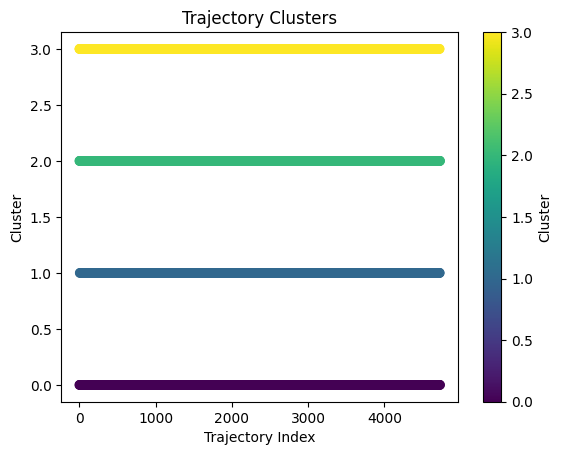

In [103]:
import matplotlib.pyplot as plt

# Create a scatter plot of the clusters
plt.scatter(filtered_df.index, filtered_df['Cluster'], c=filtered_df['Cluster'], cmap='viridis')

# Set the plot title and labels
plt.title('Trajectory Clusters')
plt.xlabel('Trajectory Index')
plt.ylabel('Cluster')

# Add a colorbar legend
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Display the plot
plt.show()

In [104]:
# How many nodes in each cluster
# Creating a DataFrame from the clusterred data
df = Clustering

# Calculating the number of nodes in each cluster
nodes_per_cluster = df.groupby('Cluster')['Path'].apply(lambda x: sum(len(path) for path in x)).to_dict()

# Print the results
for cluster, node_count in nodes_per_cluster.items():
    print(f"Cluster {cluster}: {node_count} nodes")

Cluster 0: 17855 nodes
Cluster 1: 61995 nodes
Cluster 2: 60399 nodes
Cluster 3: 92377 nodes


In [105]:
Clustering.columns

Index(['Agent', 'Start Node', 'End Node', 'Color Preference', 'Path', 'Length',
       'Time Taken', 'Preferred_Color_Count', 'Distinct_Nodes_Visited',
       'Path_Complexity', 'Visited_Shapes', 'Visited_Shininess', 'Cluster'],
      dtype='object')

In [106]:
Clustering.Visited_Shapes

0       [triangle, square, circle, circle, circle, tri...
1       [circle, square, circle, circle, triangle, cir...
2       [triangle, triangle, triangle, triangle, circl...
3       [circle, triangle, square, circle, triangle, c...
4       [triangle, square, square, triangle, triangle,...
                              ...                        
4726    [circle, circle, square, circle, circle, trian...
4727                                     [circle, square]
4728    [triangle, circle, square, circle, triangle, t...
4729    [circle, circle, triangle, square, triangle, t...
4730                             [circle, circle, circle]
Name: Visited_Shapes, Length: 4731, dtype: object

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features and target
total_nodes=num_nodes

# Flatten the lists in 'Visited_Shapes'
Clustering['Visited_Shapes'] = Clustering['Visited_Shapes'].apply(lambda x: '|'.join(x))

# One-hot encode categorical columns
X = Clustering[['Path_Complexity', 'Preferred_Color_Count','Distinct_Nodes_Visited', 'Visited_Shapes']]
X = pd.get_dummies(X, columns=['Visited_Shapes'])
y = Clustering['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Optionally sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Save to CSV
feature_importance_df.to_csv('feature_importances.csv', index=False)

                                                Feature  Importance
2                                Distinct_Nodes_Visited    0.467060
1                                 Preferred_Color_Count    0.459785
0                                       Path_Complexity    0.073155
4596  Visited_Shapes_triangle|triangle|triangle|tria...    0.000000
3062  Visited_Shapes_triangle|circle|triangle|circle...    0.000000
...                                                 ...         ...
1538  Visited_Shapes_circle|triangle|triangle|square...    0.000000
1539  Visited_Shapes_circle|triangle|triangle|square...    0.000000
1540  Visited_Shapes_circle|triangle|triangle|square...    0.000000
1541  Visited_Shapes_circle|triangle|triangle|square...    0.000000
4597  Visited_Shapes_triangle|triangle|triangle|tria...    0.000000

[4598 rows x 2 columns]


In [108]:
feature_importance_df.head(10)

,Feature,Importance
2,Distinct_Nodes_Visited,0.467060
1,Preferred_Color_Count,0.459785
0,Path_Complexity,0.073155
4596,Visited_Shapes_triangle|triangle|triangle|tria...,0.000000
3062,Visited_Shapes_triangle|circle|triangle|circle...,0.000000
3068,Visited_Shapes_triangle|circle|triangle|circle...,0.000000
3067,Visited_Shapes_triangle|circle|triangle|circle...,0.000000
3066,Visited_Shapes_triangle|circle|triangle|circle...,0.000000
3065,Visited_Shapes_triangle|circle|triangle|circle...,0.000000
3064,Visited_Shapes_triangle|circle|triangle|circle...,0.000000


In [25]:
# Multi-classification approach to build a model based on each cluster and extract feature importances

In [109]:
# Multi-classification approach to build a model based on each cluster and extract feature importances
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define the clusters you want to analyze 
clusters_to_analyze = np.unique(cluster_labels).tolist()

# Create an empty dictionary to store feature importances for each cluster
feature_importance_dict = {}

# Flatten the lists in 'Visited_Shapes'
# Clustering['Visited_Shapes'] = Clustering['Visited_Shapes'].apply(lambda x: '|'.join(x))

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for cluster in clusters_to_analyze:
    # Subset the data for the current cluster
    cluster_data = Clustering.copy()  # Make a copy of the original data
    cluster_data['Cluster'] = np.where(cluster_data['Cluster'] == cluster, 1, 0)  # Convert to binary labels

    # One-hot encode categorical columns
    X = cluster_data[['Path_Complexity', 'Preferred_Color_Count', 'Distinct_Nodes_Visited', 'Visited_Shapes']]
    X = pd.get_dummies(X, columns=['Visited_Shapes'])

    y = cluster_data['Cluster']  # Binary labels for the current cluster

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the XGBoost model for binary classification
    model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances for the current cluster
    feature_importances = model.feature_importances_

    # Create a DataFrame to store the feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    # Store feature importances in the dictionary with the cluster as the key
    feature_importance_dict[f'Cluster_{cluster}_importance'] = feature_importance_df

    # Print or save feature importances for this cluster if needed
    print(f"Feature importances for Cluster {cluster}:")
    print(feature_importance_df.head())

# Save feature importances to CSV for each cluster if needed
for cluster, importance_df in feature_importance_dict.items():
    importance_df.to_csv(f'feature_importances_cluster_{cluster}.csv', index=False)


Feature importances for Cluster 0:
                                                Feature  Importance
1                                 Preferred_Color_Count    0.983169
0                                       Path_Complexity    0.010369
2                                Distinct_Nodes_Visited    0.006462
3063  Visited_Shapes_triangle|circle|triangle|circle...    0.000000
3069  Visited_Shapes_triangle|circle|triangle|circle...    0.000000
Feature importances for Cluster 1:
                                                Feature  Importance
2                                Distinct_Nodes_Visited    0.559792
1                                 Preferred_Color_Count    0.382514
0                                       Path_Complexity    0.057694
4596  Visited_Shapes_triangle|triangle|triangle|tria...    0.000000
3062  Visited_Shapes_triangle|circle|triangle|circle...    0.000000
Feature importances for Cluster 2:
                                                Feature  Importance
2          

In [110]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define the clusters you want to analyze 
clusters_to_analyze = np.unique(cluster_labels).tolist()

# Create an empty dictionary to store feature importances for each cluster
feature_importance_dict = {}

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for cluster in clusters_to_analyze:
    # Subset the data for the current cluster
    cluster_data = Clustering.copy()  # Make a copy of the original data
    cluster_data['Cluster'] = np.where(cluster_data['Cluster'] == cluster, 1, 0)  # Convert to binary labels

    # One-hot encode categorical columns
    X = cluster_data[['Path_Complexity', 'Preferred_Color_Count', 'Distinct_Nodes_Visited', 'Visited_Shapes']]
    X = pd.get_dummies(X, columns=['Visited_Shapes'])

    y = cluster_data['Cluster']  # Binary labels for the current cluster

    # Encode the target variable into binary labels
    y = label_encoder.fit_transform(y)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the XGBoost model for binary classification
    model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances for the current cluster
    feature_importances = model.feature_importances_

    # Create a DataFrame to store the feature importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # Add the cluster variable to the feature importance table
    feature_importance_df['Cluster'] = cluster

    # sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

    # Store feature importances in the dictionary with the cluster as the key
    feature_importance_dict[f'Cluster_{cluster}_importance'] = feature_importance_df

    # Print or save feature importances for this cluster if needed
    print(f"Feature importances for Cluster {cluster}:")
    print(feature_importance_df.head())


Feature importances for Cluster 0:
                                                Feature  Importance  Cluster
1                                 Preferred_Color_Count    0.983169        0
0                                       Path_Complexity    0.010369        0
2                                Distinct_Nodes_Visited    0.006462        0
3063  Visited_Shapes_triangle|circle|triangle|circle...    0.000000        0
3069  Visited_Shapes_triangle|circle|triangle|circle...    0.000000        0
Feature importances for Cluster 1:
                                                Feature  Importance  Cluster
2                                Distinct_Nodes_Visited    0.559792        1
1                                 Preferred_Color_Count    0.382514        1
0                                       Path_Complexity    0.057694        1
4596  Visited_Shapes_triangle|triangle|triangle|tria...    0.000000        1
3062  Visited_Shapes_triangle|circle|triangle|circle...    0.000000        1
Featur

In [27]:
# We make a copy of the original Clustering data for each cluster iteration.
# We convert the 'Cluster' column to binary labels (1 for the current cluster, 0 for all others) within each cluster-specific dataset.
# We train a separate binary classifier for each cluster using the converted binary labels.
# Feature importances are calculated and stored for each cluster as you requested.
# This code will create separate binary classifiers for each cluster and calculate feature importances accordingly.

In [142]:
# Define the threshold for feature importance
threshold = 0.01  # Adjust this threshold as needed

# Create an empty list to store important features DataFrames
dfs_to_concat = []

# Iterate over the feature_importance_dict
for cluster, importance_df in feature_importance_dict.items():
    # Apply threshold to select important features
    important_features = importance_df[importance_df['Importance'] >= threshold]

    # Append the important features DataFrame to the list
    dfs_to_concat.append(important_features)

# Concatenate all DataFrames in the list
important_features_df = pd.concat(dfs_to_concat, ignore_index=True)

# Print or display the DataFrame with important features
print("DataFrame with Important Features:")
print(important_features_df)


DataFrame with Important Features:
                  Feature  Importance  Cluster
0   Preferred_Color_Count    0.983169        0
1         Path_Complexity    0.010369        0
2  Distinct_Nodes_Visited    0.559792        1
3   Preferred_Color_Count    0.382514        1
4         Path_Complexity    0.057694        1
5  Distinct_Nodes_Visited    0.698890        2
6         Path_Complexity    0.183326        2
7   Preferred_Color_Count    0.117784        2
8  Distinct_Nodes_Visited    0.945584        3
9         Path_Complexity    0.047834        3


In [140]:
important_features_df

,Cluster,Feature,Importance
0,0,Preferred_Color_Count,0.983169
1,0,Path_Complexity,0.010369
2,0,Distinct_Nodes_Visited,0.006462
3,1,Distinct_Nodes_Visited,0.559792
4,1,Preferred_Color_Count,0.382514
5,1,Path_Complexity,0.057694
6,2,Distinct_Nodes_Visited,0.698890
7,2,Path_Complexity,0.183326
8,2,Preferred_Color_Count,0.117784
9,3,Distinct_Nodes_Visited,0.945584


In [143]:
Clustering.head(2)

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Visited_Shininess,Cluster
0,0,90,80,red,"[90, 12, 20, 16, 56, 2, 98, 30, 68, 88, 58, 48...",15,0.000000,15,15,14,triangle|square|circle|circle|circle|triangle|...,"[not_shiny, not_shiny, shiny, not_shiny, shiny...",0
1,1,31,60,yellow,"[31, 51, 31, 43, 83, 65, 33, 73, 35, 87, 3, 89...",57,0.000632,51,56,56,circle|square|circle|circle|triangle|circle|tr...,"[shiny, not_shiny, shiny, shiny, shiny, not_sh...",0


In [155]:
# Merge the original DataFrame with the preferences DataFrame by the 'Cluster' variable
merged_df = pd.merge(Clustering, important_features_df, on='Cluster', how='left')

# Iterate over the merged DataFrame to create additional preference columns
for i, col in enumerate(important_features_df.columns):
    # Skip the 'Cluster' column
    if col == 'Cluster':
        continue
    # Create new column names for preferences
    new_col_name = f'preference_{i+1:02d}'
    # Assign the values of the preferences to the new column
    merged_df[new_col_name] = merged_df[col]

In [156]:
merged_df

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Visited_Shininess,Cluster,Feature,Importance,preference_01,preference_02
0,0,90,80,red,"[90, 12, 20, 16, 56, 2, 98, 30, 68, 88, 58, 48...",15,0.000000,15,15,14,triangle|square|circle|circle|circle|triangle|...,"[not_shiny, not_shiny, shiny, not_shiny, shiny...",0,Preferred_Color_Count,0.983169,Preferred_Color_Count,0.983169
1,0,90,80,red,"[90, 12, 20, 16, 56, 2, 98, 30, 68, 88, 58, 48...",15,0.000000,15,15,14,triangle|square|circle|circle|circle|triangle|...,"[not_shiny, not_shiny, shiny, not_shiny, shiny...",0,Path_Complexity,0.010369,Path_Complexity,0.010369
2,1,31,60,yellow,"[31, 51, 31, 43, 83, 65, 33, 73, 35, 87, 3, 89...",57,0.000632,51,56,56,circle|square|circle|circle|triangle|circle|tr...,"[shiny, not_shiny, shiny, shiny, shiny, not_sh...",0,Preferred_Color_Count,0.983169,Preferred_Color_Count,0.983169
3,1,31,60,yellow,"[31, 51, 31, 43, 83, 65, 33, 73, 35, 87, 3, 89...",57,0.000632,51,56,56,circle|square|circle|circle|triangle|circle|tr...,"[shiny, not_shiny, shiny, shiny, shiny, not_sh...",0,Path_Complexity,0.010369,Path_Complexity,0.010369
4,2,27,7,red,"[27, 66, 38, 14, 0, 86, 92, 64, 98, 52, 36, 2,...",93,0.002054,50,92,92,triangle|triangle|triangle|triangle|circle|squ...,"[shiny, shiny, not_shiny, shiny, shiny, not_sh...",1,Distinct_Nodes_Visited,0.559792,Distinct_Nodes_Visited,0.559792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10529,2,66,4,yellow,"[66, 75, 69, 89, 19, 27, 41, 25, 81, 85, 91, 7...",56,0.000000,50,56,55,triangle|circle|square|circle|triangle|triangl...,"[not_shiny, not_shiny, not_shiny, not_shiny, s...",0,Path_Complexity,0.010369,Path_Complexity,0.010369
10530,3,35,22,yellow,"[35, 51, 85, 47, 45, 41, 25, 3, 89, 5, 93, 49,...",56,0.007515,51,55,55,circle|circle|triangle|square|triangle|triangl...,"[shiny, not_shiny, not_shiny, not_shiny, shiny...",0,Preferred_Color_Count,0.983169,Preferred_Color_Count,0.983169
10531,3,35,22,yellow,"[35, 51, 85, 47, 45, 41, 25, 3, 89, 5, 93, 49,...",56,0.007515,51,55,55,circle|circle|triangle|square|triangle|triangl...,"[shiny, not_shiny, not_shiny, not_shiny, shiny...",0,Path_Complexity,0.010369,Path_Complexity,0.010369
10532,4,50,90,red,"[50, 18, 6, 90]",4,0.000000,4,4,3,circle|circle|circle,"[not_shiny, shiny, shiny]",0,Preferred_Color_Count,0.983169,Preferred_Color_Count,0.983169


In [ ]:
# Evaluation engine

In [54]:
trajectory_data = cluster_data.copy()
def prepare_data_for_modeling(trajectory_data, preferences=None):
    # Extract relevant features
    features = trajectory_data[['Current_Node', 'Path_Complexity', 'Preferred_Color_Count', 'Distinct_Nodes_Visited']]
    
    # Include preferences if available
    if preferences is not None:
        # Merge preferences with trajectory data based on a common key
        # For example, if preferences are obtained per cluster, merge based on the 'Cluster' column
        features = pd.merge(features, preferences, on='Cluster', how='left')
    
    # Define the target variable
    target_variable = trajectory_data['Next_Node']
    
    return features, target_variable

# Split data into features and target variable
features, target_variable = prepare_data_for_modeling(trajectory_data, preferences)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)


NameError: name 'preferences' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize models
model_without_preferences = DecisionTreeClassifier(random_state=42)  #  model without preferences
model_with_preferences = RandomForestClassifier(random_state=42)    #  model with preferences

# Train models
model_without_preferences.fit(X_train_without_preferences, y_train)  # Train model without preferences
model_with_preferences.fit(X_train_with_preferences, y_train)        # Train model with preferences

Hyperparameter tuning

# Evaluate models
y_pred_without_preferences = model_without_preferences.predict(X_test_without_preferences)
y_pred_with_preferences = model_with_preferences.predict(X_test_with_preferences)

# Calculate accuracy 
accuracy_without_preferences = accuracy_score(y_test, y_pred_without_preferences)
accuracy_with_preferences = accuracy_score(y_test, y_pred_with_preferences)

print("Model without preferences accuracy:", accuracy_without_preferences)
print("Model with preferences accuracy:", accuracy_with_preferences)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate model without preferences
accuracy_without_preferences = accuracy_score(y_test, y_pred_without_preferences)
precision_without_preferences = precision_score(y_test, y_pred_without_preferences)
recall_without_preferences = recall_score(y_test, y_pred_without_preferences)
f1_score_without_preferences = f1_score(y_test, y_pred_without_preferences)
roc_auc_without_preferences = roc_auc_score(y_test, y_pred_without_preferences)

# Evaluate model with preferences
accuracy_with_preferences = accuracy_score(y_test, y_pred_with_preferences)
precision_with_preferences = precision_score(y_test, y_pred_with_preferences)
recall_with_preferences = recall_score(y_test, y_pred_with_preferences)
f1_score_with_preferences = f1_score(y_test, y_pred_with_preferences)
roc_auc_with_preferences = roc_auc_score(y_test, y_pred_with_preferences)

# Print evaluation metrics
print("Model without preferences:")
print("Accuracy:", accuracy_without_preferences)
print("Precision:", precision_without_preferences)
print("Recall:", recall_without_preferences)
print("F1-score:", f1_score_without_preferences)
print("ROC AUC:", roc_auc_without_preferences)
print()

print("Model with preferences:")
print("Accuracy:", accuracy_with_preferences)
print("Precision:", precision_with_preferences)
print("Recall:", recall_with_preferences)
print("F1-score:", f1_score_with_preferences)
print("ROC AUC:", roc_auc_with_preferences)
print()

# Comparison
print("Comparison:")
print("Accuracy improvement with preferences:", accuracy_with_preferences - accuracy_without_preferences)
print("Precision improvement with preferences:", precision_with_preferences - precision_without_preferences)
print("Recall improvement with preferences:", recall_with_preferences - recall_without_preferences)
print("F1-score improvement with preferences:", f1_score_with_preferences - f1_score_without_preferences)
print("ROC AUC improvement with preferences:", roc_auc_with_preferences - roc_auc_without_preferences)


In [ ]:

# Gaussian Mixture Model (GMM) clustering

# Convert the 'Path' column to strings
data['Path'] = data['Path'].apply(lambda x: ','.join(map(str, x)))

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Agent', 'Start Node', 'End Node', 'Length']])

# Perform GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(scaled_features)

# Assign cluster labels to the data
cluster_labels = gmm.predict(scaled_features)
data['Cluster'] = cluster_labels

# Print the resulting clusters
# print(data[['Agent', 'Start Node', 'End Node', 'Color Preference', 'Path', 'Length', 'Cluster']])

import matplotlib.pyplot as plt

# Create a scatter plot of the clusters
plt.scatter(data['Start Node'], data['End Node'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Start Node')
plt.ylabel('End Node')
plt.title('GMM Clustering')
plt.colorbar(label='Cluster')
plt.show()


# Create a box plot of trajectory lengths for each cluster
sns.boxplot(x='Cluster', y='Length', data=data)
plt.xlabel('Cluster')
plt.ylabel('Trajectory Length')
plt.title('Trajectory Length in Each Cluster')
plt.show()


In [ ]:
df = filtered_df

# Extract the path sequences from the dataframe
path_sequences = df['Path'].astype(str)

# Convert the path sequences into numerical features using CountVectorizer
vectorizer = CountVectorizer()
path_features = vectorizer.fit_transform(path_sequences)

# Convert the sparse matrix to a dense array
path_features_dense = path_features.toarray()

# Create a DataFrame from the dense array
path_features_df = pd.DataFrame(path_features_dense, columns=vectorizer.get_feature_names_out())

# Combine the path features DataFrame with other variables 
combined_features = pd.concat([path_features_df, df[['Distinct_Nodes_Visited','Path_Complexity']]], axis=1)

# Normalize the combined features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(combined_features)

# Perform K-means clustering
num_clusters = 4  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_features)

# Add the cluster labels to the dataframe
df['Cluster'] = cluster_labels

Print the clustered trajectory data
Clustering = df


New Dataset

In [29]:
y_train

1117    1
3102    0
2707    0
1102    0
2181    0
       ..
1095    0
1130    0
1294    0
860     0
3174    0
Name: Cluster, Length: 2670, dtype: int32

In [30]:
def add_noise_to_data(df, noise_stddev=0.1):

    noisy_df = df.copy()
    columns_to_noise = [
        
        'Length',
        'Distinct_Nodes_Visited',
        'Preferred_Color_Count',
        'Path_Complexity','Distinct_Nodes_Visited'
        
    ]
    # Add random noise to the selected columns
    for column in columns_to_noise:
        noisy_df[column] += np.random.normal(0, noise_stddev, len(df))

    return noisy_df

# Adding noise to filtered DataFrame
noisy_filtered_df = add_noise_to_data(filtered_df, noise_stddev=0.2)

# Printing the first 10 rows of the noisy DataFrame
noisy_filtered_df.head(2)

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Visited_Shininess,Cluster
0,0,5,4,red,"[5, 12, 14, 0, 2, 11, 3, 6, 8, 10, 4]",10.866223,0.0,7.986048,11.295314,9.828356,triangle|triangle|triangle|circle|circle|circl...,"[not_shiny, not_shiny, shiny, shiny, not_shiny...",0
1,1,11,7,red,"[11, 2, 0, 10, 8, 6, 3, 4, 14, 12, 5, 7]",11.966300,0.0,8.029122,11.714830,10.972555,circle|triangle|triangle|circle|circle|circle|...,"[shiny, shiny, not_shiny, shiny, shiny, shiny,...",0


In [31]:
df = noisy_filtered_df

# Extract the path sequences from the dataframe
path_sequences = df['Path'].astype(str)

# Convert the path sequences into numerical features using CountVectorizer
vectorizer = CountVectorizer()
path_features = vectorizer.fit_transform(path_sequences)

# Convert the sparse matrix to a dense array
path_features_dense = path_features.toarray()

# Create a DataFrame from the dense array
path_features_df = pd.DataFrame(path_features_dense, columns=vectorizer.get_feature_names_out())

# Combine the path features DataFrame with other variables 
combined_features = pd.concat([path_features_df, df[[from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Select features and target
total_nodes=num_nodes
# Now you can use these new features in your model training
X = trajectory_df[['Length', 'Time Taken', 'Normalized_Length', 'Unique_Nodes', 'Most_Common_Node_Frequency']]
y = trajectory_df['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)

# ************************************************************
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and fit the Random Forest model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# **************************************************************

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Optionally sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Save to CSV
feature_importance_df.to_csv('feature_importances.csv', index=False)]]], axis=1)

# Normalize the combined features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(combined_features)

# Perform K-means clustering
num_clusters = 4  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_features)

# Add the cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Print the clustered trajectory data
trajectory_df_01 = df
trajectory_df_01.head(2)


SyntaxError: invalid syntax (1663679314.py, line 17)

In [252]:
# Calculate the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(trajectory_df_01['Color Preference'], cluster_labels)
print("Adjusted Rand Index (ARI):", ari)

# Calculate the Adjusted Mutual Information (AMI)
ami = adjusted_mutual_info_score(trajectory_df_01['Color Preference'], cluster_labels)
print("Adjusted Mutual Information (AMI):", ami)

Adjusted Rand Index (ARI): 0.1258756311911263
Adjusted Mutual Information (AMI): 0.17440024257460315


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Select features and target
total_nodes=num_nodes
# Now you can use these new features in your model training
X = trajectory_df[[from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Select features and target
total_nodes=num_nodes
# Now you can use these new features in your model training
X = trajectory_df[['Length', 'Time Taken', 'Normalized_Length', 'Unique_Nodes', 'Most_Common_Node_Frequency']]
y = trajectory_df['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)

# ************************************************************
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and fit the Random Forest model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# **************************************************************

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Optionally sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Save to CSV
feature_importance_df.to_csv('feature_importances.csv', index=False)]]
y = trajectory_df['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)

# ************************************************************
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and fit the Random Forest model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# **************************************************************

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Optionally sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Save to CSV
feature_importance_df.to_csv('feature_importances.csv', index=False)

# Hierachical Clustering

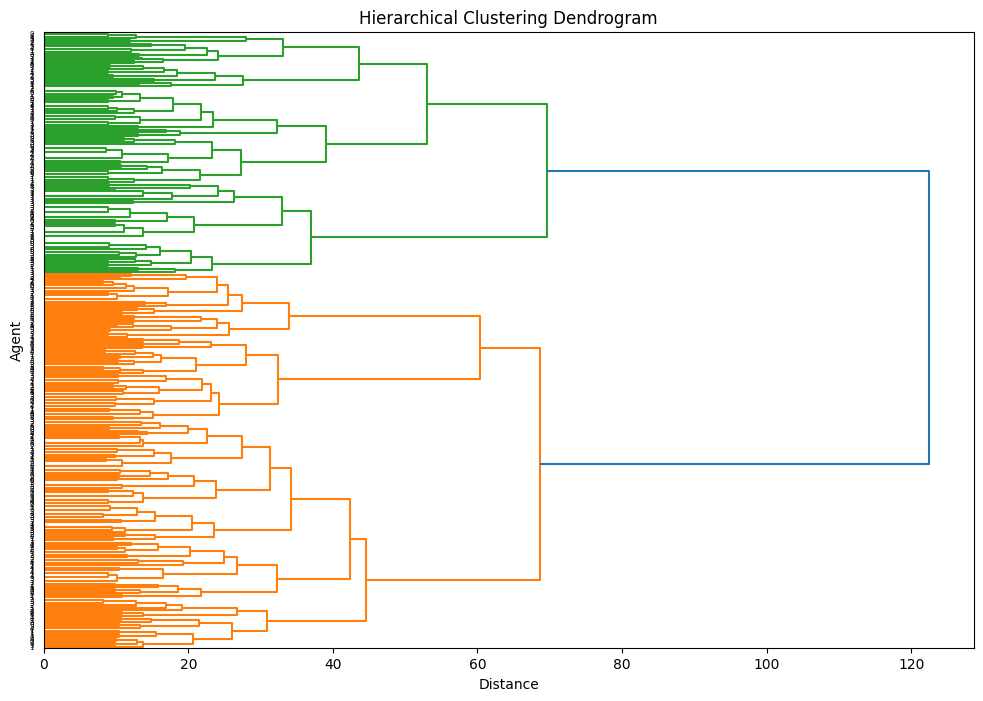

In [253]:
from scipy.cluster.hierarchy import dendrogram, linkage

df = filtered_df
# Create a distance matrix based on the path lengths
distance_matrix = np.zeros((len(df), len(df)))
for i, path1 in enumerate(df['Path']):
    for j, path2 in enumerate(df['Path']):
        distance_matrix[i, j] = len(set(path1 + path2)) - len(set(path1))

# Perform hierarchical clustering
linkage_matrix = linkage(distance_matrix, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df['Agent'].tolist(), orientation='right')
plt.xlabel('Distance')
plt.ylabel('Agent')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [ ]:
# noise vs clusstering accuracy plot

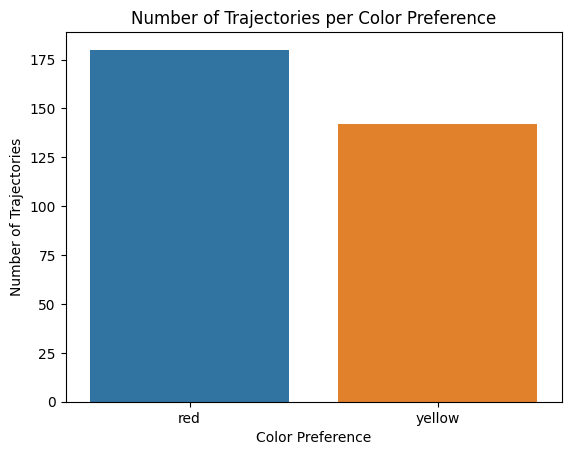

In [254]:
# Count the number of trajectories per color preference
color_counts = df['Color Preference'].value_counts()

# Create a bar plot of the number of trajectories per color preference
sns.barplot(x=color_counts.index, y=color_counts.values)
plt.xlabel('Color Preference')
plt.ylabel('Number of Trajectories')
plt.title('Number of Trajectories per Color Preference')
plt.show()

In [255]:
# Implementing DBScan

# Read the dataset into a DataFrame
data = filtered_df

# Convert the 'Path' column to strings
data['Path'] = data['Path'].apply(lambda x: ','.join(map(str, x)))

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Agent', 'Start Node', 'End Node', 'Length', 'Time Taken']])

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=2)
clusters = dbscan.fit_predict(scaled_features)

# Add the cluster labels to the DataFrame
data['Cluster'] = clusters

# Print the resulting clusters
print(data[['Agent', 'Start Node', 'End Node', 'Color Preference', 'Path', 'Length', 'Cluster', 'Time Taken']])


     Agent  Start Node  End Node Color Preference  \
0        0           8         4              red   
1        1           9         5           yellow   
2        2           6         3           yellow   
3        3           5        13           yellow   
4        4          10         3              red   
..     ...         ...       ...              ...   
317      1           8        12              red   
318      3           0         9              red   
319      0          11         9              red   
320      1          13         8              red   
321      4          12        10              red   

                            Path  Length  Cluster  Time Taken  
0                         8,10,4       3       -1         0.0  
1                          9,1,5       3        0         0.0  
2                            6,3       2        1         0.0  
3                   5,9,3,1,5,13       6       -1         0.0  
4         10,8,10,0,14,12,2,11,3       9   

In [256]:
data.head()

,Agent,Start Node,End Node,Color Preference,Path,Length,Time Taken,Preferred_Color_Count,Distinct_Nodes_Visited,Path_Complexity,Visited_Shapes,Visited_Shininess,Cluster
0,0,8,4,red,"8,10,4",3,0.0,3,3,2,"[triangle, triangle]","[not_shiny, shiny]",-1
1,1,9,5,yellow,"9,1,5",3,0.0,3,3,2,"[circle, triangle]","[not_shiny, not_shiny]",0
2,2,6,3,yellow,"6,3",2,0.0,1,2,1,[circle],[shiny],1
3,3,5,13,yellow,"5,9,3,1,5,13",6,0.0,6,5,5,"[triangle, circle, circle, triangle, circle]","[shiny, shiny, not_shiny, not_shiny, shiny]",-1
4,4,10,3,red,"10,8,10,0,14,12,2,11,3",9,0.0,7,8,8,"[circle, triangle, triangle, triangle, triangl...","[shiny, not_shiny, shiny, not_shiny, not_shiny...",2


In [257]:
# Calculate the Adjusted Rand Index (ARI)
ari = adjusted_rand_score(data['Color Preference'], data.Cluster)
print("Adjusted Rand Index (ARI):", ari)

# Calculate the Adjusted Mutual Information (AMI)
ami = adjusted_mutual_info_score(data['Color Preference'], data.Cluster)
print("Adjusted Mutual Information (AMI):", ami)

Adjusted Rand Index (ARI): -0.0047719804493018304
Adjusted Mutual Information (AMI): -0.001574492376196998


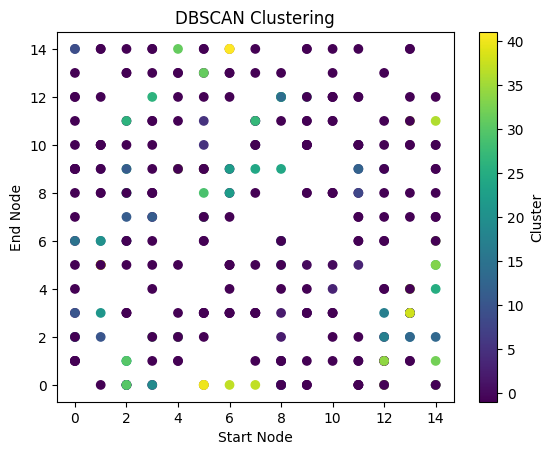

In [258]:
# Create a scatter plot of the clusters
plt.scatter(data['Start Node'], data['End Node'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Start Node')
plt.ylabel('End Node')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

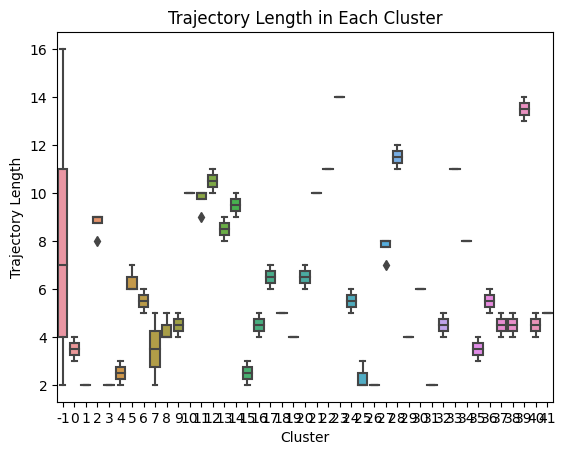

In [259]:
sns.boxplot(x='Cluster', y='Length', data=data)
plt.xlabel('Cluster')
plt.ylabel('Trajectory Length')
plt.title('Trajectory Length in Each Cluster')
plt.show()

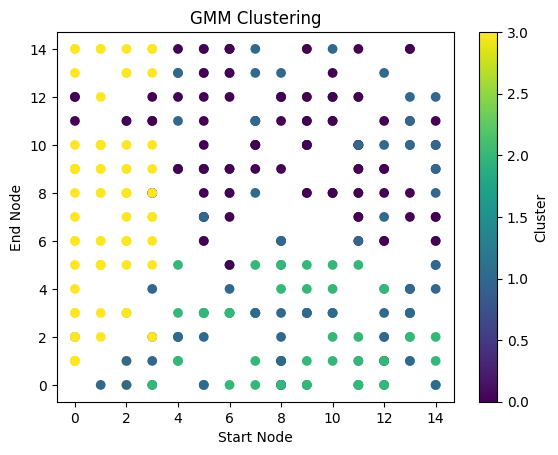

In [260]:
# Gaussian Mixture Model (GMM) clustering

# Convert the 'Path' column to strings
data['Path'] = data['Path'].apply(lambda x: ','.join(map(str, x)))

# Standardize the numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Agent', 'Start Node', 'End Node', 'Length']])

# Perform GMM clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(scaled_features)

# Assign cluster labels to the data
cluster_labels = gmm.predict(scaled_features)
data['Cluster'] = cluster_labels

# Print the resulting clusters
# print(data[['Agent', 'Start Node', 'End Node', 'Color Preference', 'Path', 'Length', 'Cluster']])

import matplotlib.pyplot as plt

# Create a scatter plot of the clusters
plt.scatter(data['Start Node'], data['End Node'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Start Node')
plt.ylabel('End Node')
plt.title('GMM Clustering')
plt.colorbar(label='Cluster')
plt.show()


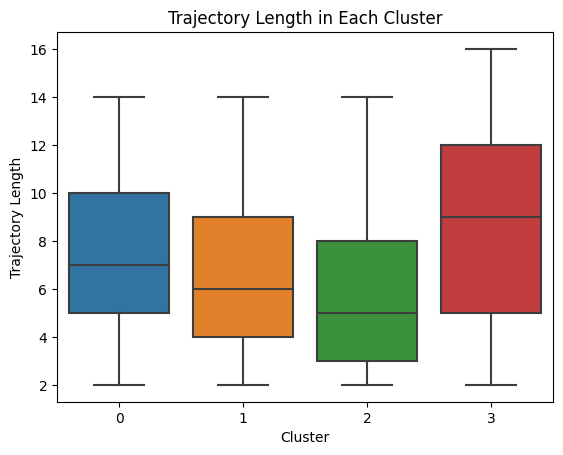

In [261]:
# Create a box plot of trajectory lengths for each cluster
sns.boxplot(x='Cluster', y='Length', data=data)
plt.xlabel('Cluster')
plt.ylabel('Trajectory Length')
plt.title('Trajectory Length in Each Cluster')
plt.show()

In [262]:
#K-Means

In [263]:
# PCA to plot the cluster  points
# Create a DataFrame from the table data

# Transform paths into a suitable format for PCA
path_matrix = np.zeros((len(filtered_df), filtered_df['Length'].max()))
for i, path in enumerate(filtered_df['Path']):
    path_matrix[i, :len(path)] = path

# Perform feature scaling using StandardScaler
scaler = StandardScaler()
scaled_path_matrix = scaler.fit_transform(path_matrix)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_path_matrix)

# Create a new DataFrame with the principal components and cluster information
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot the cluster points
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Adjust the colors based on the number of clusters
for cluster in pca_df['Cluster'].unique():
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'], color=colors[cluster], label=f'Cluster {cluster}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Points')
plt.legend()
plt.show()

ValueError: could not convert string to float: '8,,,1,0,,,4'

In [179]:
import Levenshtein

# Get the path sequences from the trajectory dataframe
path_sequences = filtered_df['Path'].astype(str).tolist()

# Initialize the diversity matrix
num_paths = len(path_sequences)
diversity_matrix = [[0] * num_paths for _ in range(num_paths)]

# Compute the pairwise dissimilarities
for i in range(num_paths):
    for j in range(i + 1, num_paths):
        path_i = path_sequences[i]
        path_j = path_sequences[j]
        
        # Compute the Levenshtein distance between the two paths
        distance = Levenshtein.distance(path_i, path_j)
        
        # Assign the distance to the diversity matrix
        diversity_matrix[i][j] = distance
        diversity_matrix[j][i] = distance

# Convert the diversity matrix into a dataframe
diversity_df = pd.DataFrame(diversity_matrix, index=filtered_df.index, columns=filtered_df.index)


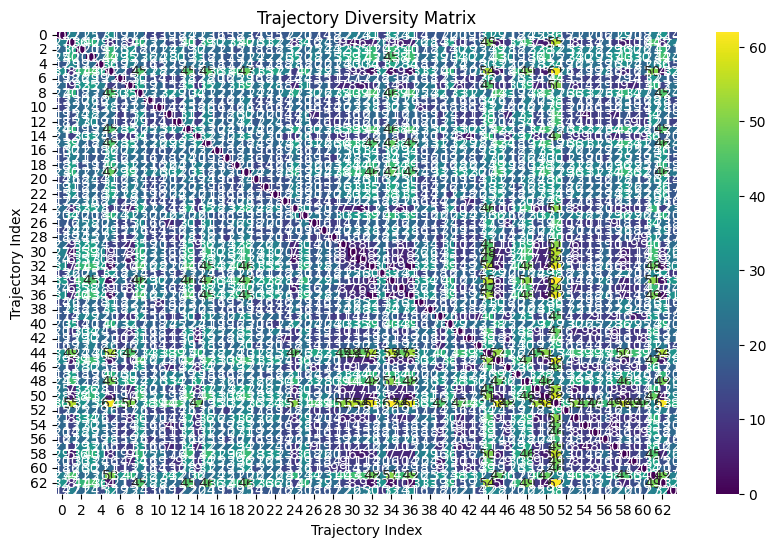

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(diversity_df, annot=True, cmap='viridis')

# Set the plot title and labels
plt.title('Trajectory Diversity Matrix')
plt.xlabel('Trajectory Index')
plt.ylabel('Trajectory Index')

# Display the plot
plt.show()


# Cluster Characterization: 
For each cluster in K-Means, calculate statistics for each feature (like the mean, median, and mode), and save the results. 

In [181]:
#Add an additional feature

In [182]:
from scipy import stats

# Create a DataFrame to store the statistics for each cluster
cluster_statistics = pd.DataFrame()

# Iterate through the unique cluster labels
for cluster in trajectory_df['Cluster'].unique():
    cluster_data = trajectory_df[trajectory_df['Cluster'] == cluster]
    
    # Calculate statistics for each feature
    statistics = {
        'Cluster': cluster,
        'Mean_Length': cluster_data['Length'].mean(),
        'Median_Length': cluster_data['Length'].median(),
        'Mode_Length': stats.mode(cluster_data['Length'])[0][0],
        'StdDev_Length': cluster_data['Length'].std(),
        'Min_Length': cluster_data['Length'].min(),
        'Max_Length': cluster_data['Length'].max(),
        'Mean_Time_Taken': cluster_data['Time Taken'].mean(),
        'Median_Time_Taken': cluster_data['Time Taken'].median(),
        'Mode_Time_Taken': stats.mode(cluster_data['Time Taken'])[0][0],
        'StdDev_Time_Taken': cluster_data['Time Taken'].std(),
        'Min_Time_Taken': cluster_data['Time Taken'].min(),
        'Max_Time_Taken': cluster_data['Time Taken'].max(),
        'Mode_Color_Preference': stats.mode(cluster_data['Color Preference'])[0][0]
        # For 'Path', you may want to define specific statistics or analyses
    }
    
    # Append the statistics for this cluster to the cluster_statistics DataFrame
    cluster_statistics = cluster_statistics.append(statistics, ignore_index=True)

# Set the Cluster column as the index
cluster_statistics.set_index('Cluster', inplace=True)

# Print the statistics for each cluster
print(cluster_statistics)

# Optionally, you can save the cluster_statistics DataFrame to a CSV file
cluster_statistics.to_csv('cluster_statistics.csv')


         Mean_Length  Median_Length  Mode_Length  StdDev_Length  Min_Length  \
Cluster                                                                       
2          11.928571           11.5           15       2.758603           8   
1           4.050000            4.0            2       1.605091           2   
0          12.117647           12.0           11       3.672233           6   
3           8.769231            8.0            8       2.127355           6   

         Max_Length  Mean_Time_Taken  Median_Time_Taken  Mode_Time_Taken  \
Cluster                                                                    
2                16         0.000000                0.0              0.0   
1                 7         0.000401                0.0              0.0   
0                19         0.000130                0.0              0.0   
3                12         0.000074                0.0              0.0   

         StdDev_Time_Taken  Min_Time_Taken  Max_Time_Taken  \
Cluste

C:\Users\taodz\AppData\Local\Temp\ipykernel_1768\235545487.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  'Mode_Length': stats.mode(cluster_data['Length'])[0][0],
C:\Users\taodz\AppData\Local\Temp\ipykernel_1768\235545487.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid

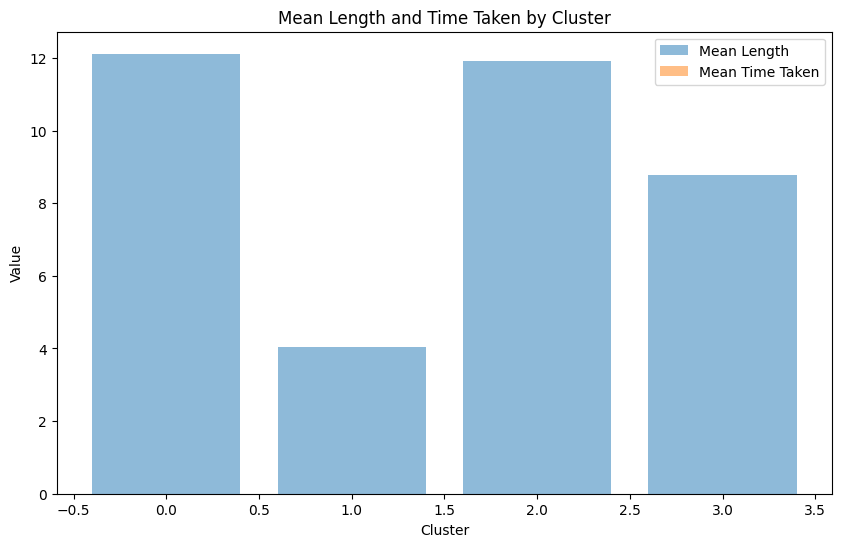

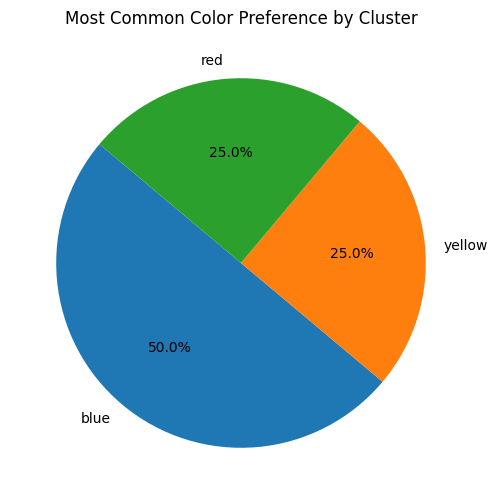

In [183]:
import matplotlib.pyplot as plt

# Bar Plot for Mean Length and Mean Time Taken
plt.figure(figsize=[10,6])
plt.bar(cluster_statistics.index, cluster_statistics['Mean_Length'], alpha=0.5, label='Mean Length')
plt.bar(cluster_statistics.index, cluster_statistics['Mean_Time_Taken'], alpha=0.5, label='Mean Time Taken')
plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Mean Length and Time Taken by Cluster')
plt.legend()
plt.show()

# Pie Chart for Color Preferences
color_modes = cluster_statistics['Mode_Color_Preference'].value_counts()
plt.figure(figsize=[6,6])
plt.pie(color_modes, labels=color_modes.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Common Color Preference by Cluster')
plt.show()


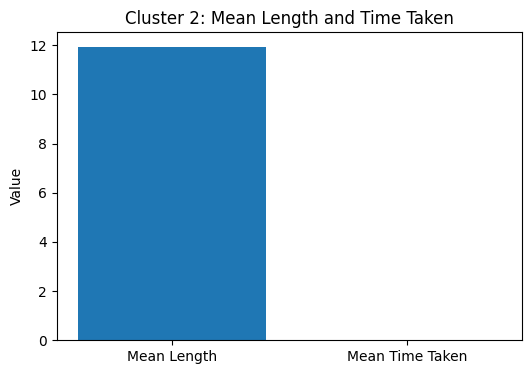

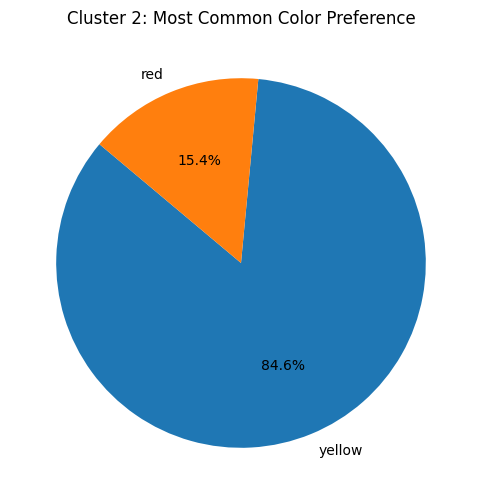

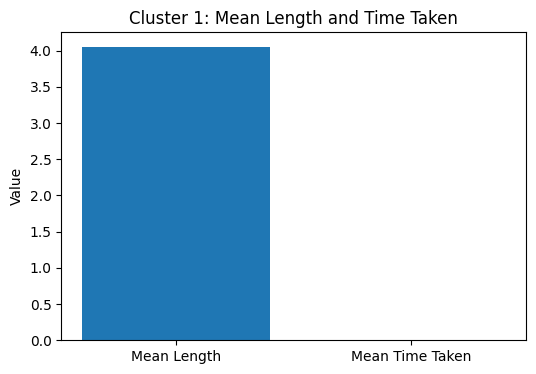

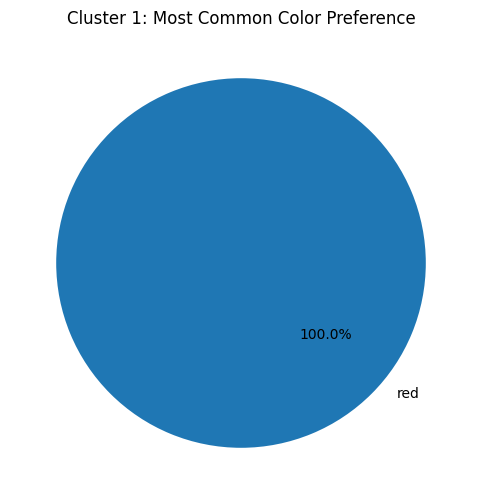

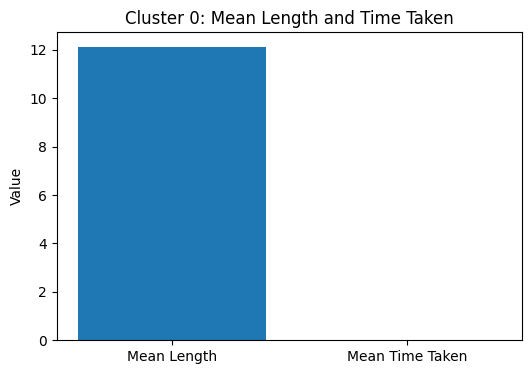

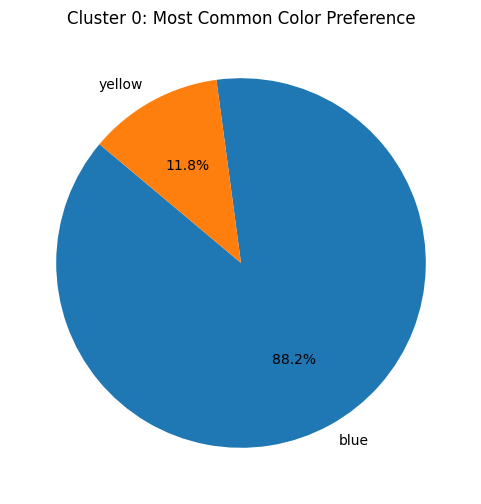

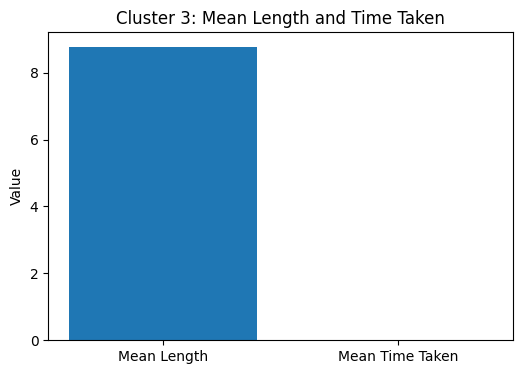

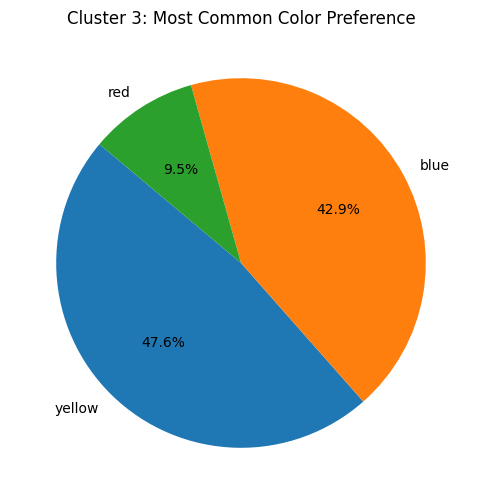

In [184]:
import matplotlib.pyplot as plt

# Iterate through each cluster and plot the graphs
for cluster in cluster_statistics.index:
    cluster_data = df[df['Cluster'] == cluster]
    
    # Bar Plot for Mean Length and Mean Time Taken for this cluster
    plt.figure(figsize=[6,4])
    plt.bar(['Mean Length', 'Mean Time Taken'], [cluster_statistics.loc[cluster, 'Mean_Length'], cluster_statistics.loc[cluster, 'Mean_Time_Taken']])
    plt.ylabel('Value')
    plt.title(f'Cluster {cluster}: Mean Length and Time Taken')
    plt.show()

    # Pie Chart for Color Preferences for this cluster
    color_modes = cluster_data['Color Preference'].value_counts()
    plt.figure(figsize=[6,6])
    plt.pie(color_modes, labels=color_modes.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Cluster {cluster}: Most Common Color Preference')
    plt.show()


In [185]:
trajectory_df.columns

Index(['Agent', 'Start Node', 'End Node', 'Color Preference', 'Path', 'Length',
       'Time Taken', 'Preferred_Color_Count', 'Distinct_Nodes_Visited',
       'Path_Complexity', 'Traversal_Success_Rate', 'Cluster'],
      dtype='object')

In [186]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#from sklearn.ensemble import xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Select features and target
total_nodes=num_nodes
# Now you can use these new features in your model training
X = trajectory_df[['Length', 'Time Taken', 'Normalized_Length', 'Unique_Nodes', 'Most_Common_Node_Frequency']]
y = trajectory_df['Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the XGBoost model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), random_state=42)
model.fit(X_train, y_train)

# ************************************************************
# Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and fit the Random Forest model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# **************************************************************

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Optionally sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Save to CSV
feature_importance_df.to_csv('feature_importances.csv', index=False)

                      Feature  Importance
4  Most_Common_Node_Frequency    0.456089
0                      Length    0.452683
3                Unique_Nodes    0.091228
1                  Time Taken    0.000000
2           Normalized_Length    0.000000


In [111]:
# print(df.isnull().sum())  # Check for NaN values
# print(np.isinf(df).sum()) # Check for Inf values
# df.fillna(df.mean(), inplace=True)
# df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace Inf with NaN
# df.fillna(df.mean(), inplace=True)  

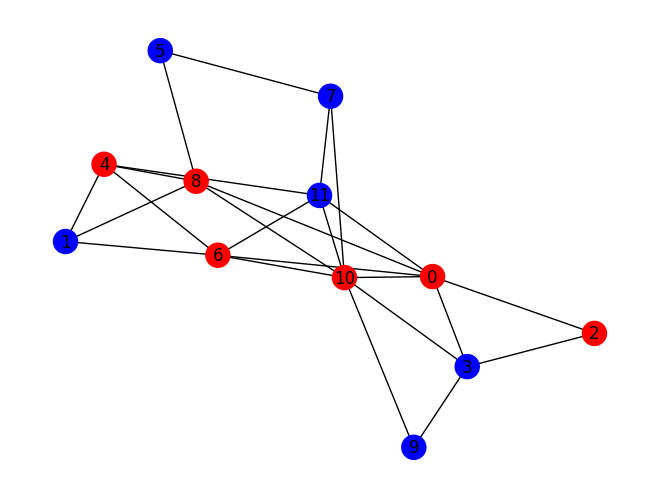

In [15]:
# we give a weight of 0.5 to nodes that have a preferred color available, a weight of 1.4 to nodes 
# that have an unpreferred color available, and a weight of 1 to nodes that have neither a preferred nor an unpreferred color available. 
# This should bias the agent towards nodes that have preferred colors, 
# while still allowing it to traverse the graph if no preferred colors are available.

class Agent:
    def __init__(self, color_preference):
        self.color_preference = color_preference
        self.current_node = None
        self.visited_nodes = set()

    def choose_next_node(self, G):
        # Get unvisited neighbors of current node
        neighbors = list(G.neighbors(self.current_node))
        unvisited_neighbors = [n for n in neighbors if n not in self.visited_nodes]

        # Choose next node with bias for preferred colors
        preferred_colors = G.nodes[self.current_node]['color']
        unpreferred_colors = list(set(self.color_preference) - set(preferred_colors))
        weights = []
        for n in unvisited_neighbors:
            node_colors = G.nodes[n]['color']
            if set(preferred_colors).intersection(node_colors):
                # If a preferred color is available, give it less weight
                weights.append(0.5)
            elif set(unpreferred_colors).intersection(node_colors):
                # If an unpreferred color is available, give it less weight
                weights.append(1.4)
            else:
                weights.append(1)
        if weights:
            total_weight = sum(weights)
            probabilities = [w / total_weight for w in weights]
            next_node = np.random.choice(unvisited_neighbors, p=probabilities)
        else:
            next_node = None

        # If all neighbors have been visited, return to previous node
#         if next_node is None:
#             next_node = self.current_node

        # Update visited nodes and current node
        self.visited_nodes.add(next_node)
        self.current_node = next_node

        return next_node

def create_agent(color_preference, start_node, end_node):
    return {
        'color_preference': set(color_preference),
        'current_node': start_node,
        'visited_nodes': {start_node},
        'end_node': end_node
    }

def find_shortest_path_with_preference(G, start_node, end_node, color_preference):
    path = []
    current_node = start_node
    visited_nodes = {start_node}
    while current_node != end_node:
        agent = create_agent(color_preference)
        agent.current_node = current_node
        next_node = agent.choose_next_node(G, visited_nodes)
        if not next_node:
            return None
        path.append((current_node, next_node))
        visited_nodes.add(next_node)
        current_node = next_node
        if current_node == end_node:
            path.append((current_node, None))
    return path


def traverse_graph_with_agents(G, agents):
    all_paths = []
    for agent in agents:
        agent['current_node'] = random.choice(list(G.nodes()))
        # set default color preference if none is specified for the agent
        if agent['color_preference'] is None:
            agent['color_preference'] = random.choice(list(G.nodes(data='color')))
        path = [agent['current_node']]
        visited_nodes = {agent['current_node']}
        while True:
            # get neighboring nodes and their colors
            neighbor_colors = {}
            for neighbor in G.neighbors(agent['current_node']):
                if neighbor not in visited_nodes:
                    color = G.nodes[neighbor]['color']
                    neighbor_colors[neighbor] = color
            # try to find a path to a node with preferred color
            if agent['color_preference'] in neighbor_colors.values():
                next_node = find_shortest_path_with_preference(G, agent['current_node'], agent['color_preference'], agent['visited_nodes'])
            # if no preferred color found, traverse to any unvisited neighbor
            else:
                unvisited_neighbors = [neighbor for neighbor in neighbor_colors.keys() if neighbor not in visited_nodes]
                if len(unvisited_neighbors) == 0:
                    break
                next_node = random.choice(unvisited_neighbors)
            visited_nodes.add(next_node)
            agent['current_node'] = next_node
            path.append(next_node)
            if next_node == agent['end_node']:
                break
        all_paths.append(path)
    return all_paths

colors = ['red', 'blue']
num_nodes = 12
edge_probability = 0.3
node_color_seed = 42  # Set a fixed seed for node colors for reproducibility
edge_seed = 123  # Set a fixed seed for edge probabilities for reproducibility
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)

# Draw graph
node_colors = [G.nodes[i]['color'] for i in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()


In [18]:
start_node = 9
end_node = 2

agents = [create_agent(['red'], start_node, end_node),
    create_agent(['blue'], start_node, end_node),
#     create_agent(['blue'], start_node, end_node),
#     create_agent(['yellow'], start_node, end_node),
#     create_agent(['red', 'green'], start_node, end_node),
#     create_agent(['red', 'blue'], start_node, end_node),
#     create_agent(['red', 'yellow'], start_node, end_node),
#     create_agent(['green', 'blue'], start_node, end_node),
#     create_agent(['green', 'yellow'], start_node, end_node),
#     create_agent(['blue', 'yellow'], start_node, end_node)
]

In [19]:
all_paths = traverse_graph_with_agents(G, agents)
for path in all_paths:
    print(path)    

[9, 10, 0, 2]
[1, 4, 6, 11, 10, 0, 8, 5, 7]


In [20]:
# Create a DataFrame from the all_paths list
# df = pd.DataFrame(all_paths, columns=["Agent{}".format(i+1) for i in range(len(agents)+1)])

# Print the DataFrame
# print(df)


In [21]:

"""
Makes the graph much sparser-done
try avoiding looping-Done
run more tests

Notes:
1. Make it print the start and end node
2. it shouldnt jump around notes but follow the edges 
3. Make it not look too much-debatable esp when we bias colors

Next Steps:
-lets generate a few traj or red and a few of blue, sense check them
-Cluster them 
-red and blue nodes
-20 trajectories that are red and 20 that are blue 
-a few traj of pref 1 and a few traj for pref 2
-then how do we extract the preference.
-Build up those kind of insights 
-have a small graph 
-look at node numbers, or node colors in the clusters of the agents 
-Are we gonna know only the nodes or what?
-think about, could something like Brandon`s algos be implemented?
-what makes sense? we need to make some design decisions
-
Branden
-consider conectivity, is it tuneable?
-how we identify which ones are red or which ones are blue-maybe clustering
Starting point 
-longest common subsequesnce/sequence type of approaches, levenshein distance functions
-then use standard clustering algorithms 
-Lev distanceenshtein\
-Levenshtein distance
-LCSS
-trajector similarity

To Do
generate a graph with 2 colors 
one randomize the noes 
he oother i add noise to the heuristic
record the number of times when the agent took the less preferred path
determine a diversity matrix, how the trajectories differ from each other
compare the diversity with a random baseline
calculate and do an average of the diversity 


Paper
Methodology 
Experiment 
Prof available Tues & thursday mornings

"""

'\nMakes the graph much sparser-done\ntry avoiding looping-Done\nrun more tests\n\nNotes:\n1. Make it print the start and end node\n2. it shouldnt jump around notes but follow the edges \n3. Make it not look too much-debatable esp when we bias colors\n\nNext Steps:\n-lets generate a few traj or red and a few of blue, sense check them\n-Cluster them \n-red and blue nodes\n-20 trajectories that are red and 20 that are blue \n-a few traj of pref 1 and a few traj for pref 2\n-then how do we extract the preference.\n-Build up those kind of insights \n-have a small graph \n-look at node numbers, or node colors in the clusters of the agents \n-Are we gonna know only the nodes or what?\n-think about, could something like Brandon`s algos be implemented?\n-what makes sense? we need to make some design decisions\n-\nBranden\n-consider conectivity, is it tuneable?\n-how we identify which ones are red or which ones are blue-maybe clustering\nStarting point \n-longest common subsequesnce/sequence ty

In [22]:
"""
Dataframe that includes the agent number, the path the agent took, 
and the percentage of nodes in the path that matched the agent's preferred color.

Notes: Pro Feedback
-bug of returning to the same node
-not terminating on the correct node
-maybe its looping
-sanity check it
-make it terminate at the last node
-FIX BUGS
1. Generate variation, if the pref was 0.6 or something, it should generate few variation of the same preference 
Then data creation is complete.
trace through the trajectories of similar agents with slight variations.
2. How do we identify preferences?
-Build an algorithm that extract preferences.

"""


import pandas as pd

# Create a list to store the output data
output_data = []

# Loop through all agents and their paths
for i, path in enumerate(all_paths):
    agent = agents[i]
    color_count = 0
    for node in path:
        node_color = G.nodes[node]['color']
        if node_color in agent['color_preference']:
            color_count += 1
    percentage = color_count / len(path) * 100
    output_data.append({'agent': i+1, 'path': path, 'color_percentage': percentage})

# Create a dataframe from the output data
df = pd.DataFrame(output_data)

# Print the dataframe
print(df.head(10))


   agent                           path  color_percentage
0      1                  [9, 10, 0, 2]         75.000000
1      2  [1, 4, 6, 11, 10, 0, 8, 5, 7]         44.444444


It seems like the termination condition for the agents' traversal is not checking whether the agent has reached the end node or not. The while True loop in traverse_graph_with_agents function is only breaking if there are no unvisited neighbors left.
Fix, add a check inside the loop to see if the agent has reached the end node or not. If the agent has reached the end node, we can break the loop and append the end node to its path.

******************************Try again **********************************

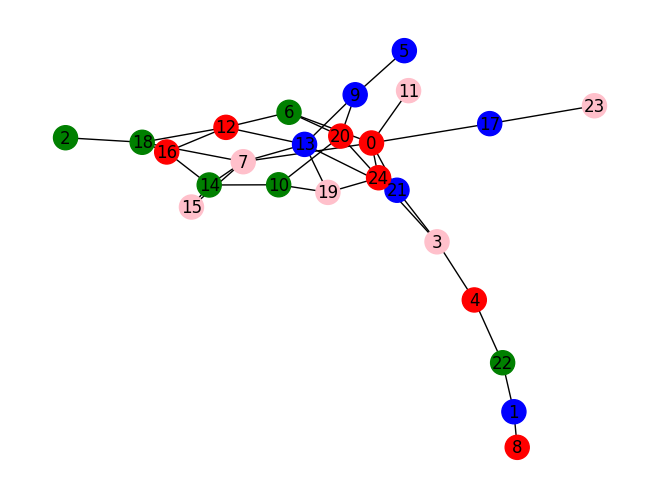

{'path': [24, 20, 9, 13, 12, 16, 18, 2], 'agent': {'color_preference': ['red'], 'start_node': 0, 'end_node': 29, 'current_node': 2, 'visited_nodes': {0, 2, 9, 12, 13, 16, 18, 20, 24}, 'path': []}}
{'path': [6, 12, 18, 2], 'agent': {'color_preference': ['green'], 'start_node': 0, 'end_node': 29, 'current_node': 2, 'visited_nodes': {0, 2, 6, 12, 18}, 'path': []}}
{'path': [17, 23], 'agent': {'color_preference': ['blue'], 'start_node': 0, 'end_node': 29, 'current_node': 23, 'visited_nodes': {0, 17, 23}, 'path': []}}


In [22]:

def create_agent(color_preference, start_node, end_node):
    agent = {
        'color_preference': color_preference,
        'start_node': start_node,
        'end_node': end_node,
        'current_node': None,
        'visited_nodes': set(),
        'path': []
    }
    return agent


def find_shortest_path_with_preference(G, start, end, color_preference, max_depth=float('inf')):
    queue = [(start, [])]
    visited = set()
    while queue:
        (node, path) = queue.pop(0)
        if node == end:
            return path + [node]
        if node in visited or len(path) >= max_depth:
            continue
        visited.add(node)
        neighbors = G[node]
        preferred_neighbors = [n for n in neighbors if G.nodes[n]['color'] in color_preference]
        non_preferred_neighbors = [n for n in neighbors if n not in preferred_neighbors]
        queue += [(n, path + [node]) for n in preferred_neighbors + non_preferred_neighbors]
    return None

def traverse_graph_with_agents(G, agents):
    all_paths = []
    for agent in agents:
        path = []
        agent['current_node'] = agent['start_node']
        agent['visited_nodes'] = set([agent['start_node']])
        while agent['current_node'] != agent['end_node']:
            current_color_preference = agent['color_preference']
            current_node = agent['current_node']
            neighbors = G[current_node]
            preferred_neighbors = [n for n in neighbors if G.nodes[n]['color'] in current_color_preference]
            if not preferred_neighbors:
                preferred_neighbors = list(neighbors)
            unvisited_neighbors = [n for n in preferred_neighbors if n not in agent['visited_nodes']]
            if not unvisited_neighbors:
                unvisited_neighbors = [n for n in neighbors if n not in agent['visited_nodes']]
            if not unvisited_neighbors:
                break
            next_node = random.choice(unvisited_neighbors)
            agent['visited_nodes'].add(next_node)
            agent['current_node'] = next_node
            path.append(next_node)
        all_paths.append({'path': path, 'agent': agent})
    return all_paths

colors = ['red', 'blue', 'green','pink']
G = generate_colored_graph(num_nodes, colors, edge_probability, node_color_seed, edge_seed)

# Draw graph
node_colors = [G.nodes[i]['color'] for i in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors)
plt.show()

start_node = 0
end_node = 29

agents = [create_agent(['red'], start_node, end_node),
    create_agent(['green'], start_node, end_node),
    create_agent(['blue'], start_node, end_node),
    # create_agent(['yellow'], start_node, end_node),
    # create_agent(['red', 'green'], start_node, end_node),
    # create_agent(['red', 'blue'], start_node, end_node),
    # create_agent(['red', 'yellow'], start_node, end_node),
    # create_agent(['green', 'blue'], start_node, end_node),
    # create_agent(['green', 'yellow'], start_node, end_node),
    # create_agent(['blue', 'yellow'], start_node, end_node)
]

all_paths = traverse_graph_with_agents(G, agents)
for path in all_paths:
    print(path)
